In [3]:
import pandas as pd
import numpy as np

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for classification modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# import functions for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# And this function to help with the normaliztion when doing cross validation
from sklearn.pipeline import Pipeline

In [4]:
#Code to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Importing feom drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Library to extract multiplr sheets from xlsb files.
!pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
# Extracting ChurnData frame
import pandas as pd
from pyxlsb import open_workbook as open_xlsb

df = []

with open_xlsb('/content/drive/MyDrive/Datascience_python/group project 2/ChurnData.xlsb') as wb:
    with wb.get_sheet(1) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])

df = pd.DataFrame(df[1:], columns=df[0])

In [68]:
# Data of users in 6th,7th and 8th months
df.shape

(182343, 65)

In [9]:
# Data explaining whether customer has exited in the 9th month or not.
import pandas as pd
from pyxlsb import open_workbook as open_xlsb
churners = []

with open_xlsb('/content/drive/MyDrive/Datascience_python/group project 2/ChurnData.xlsb') as wb:
    with wb.get_sheet(2) as sheet:
        for row in sheet.rows():
            churners.append([item.v for item in row])

churners = pd.DataFrame(churners[1:], columns=churners[0])

In [69]:
print(churners.shape)
print(churners)

(66469, 4)
         year  month  user_account_id  churn
0      2013.0    9.0         376265.0    0.0
1      2013.0    9.0        1151965.0    0.0
2      2013.0    9.0        1186430.0    0.0
3      2013.0    9.0        1036474.0    0.0
4      2013.0    9.0         934461.0    0.0
...       ...    ...              ...    ...
66464  2013.0    9.0         403311.0    0.0
66465  2013.0    9.0          18806.0    0.0
66466  2013.0    9.0         346074.0    0.0
66467  2013.0    9.0          17385.0    0.0
66468  2013.0    9.0         989825.0    0.0

[66469 rows x 4 columns]


In [ ]:
# Data of unique users in each month
x=df['month'].value_counts()
x

8.0    66469
7.0    58218
6.0    57656
Name: month, dtype: int64

It can be observed that:





*   There are around 8251 new customers who paid for  prepaid phone data in 8th month.
*   There are around 562 new customers who paid for prepaid phone data in 7th month.




# Reorganizing the data for modeling

The data of each customers is reconstructed into a single row, by splitting their records in 6th,7th and 8th months.

In [70]:
# Customers data in each month is extracted seperately.
df_8=df[df['month']==8.0]
df_7=df[df['month']==7.0]
df_6=df[df['month']==6.0]
print(df_6.shape)

(57656, 65)


In [71]:
# Renaming the columns in 8th month
df_8.columns = ['year_8', 'month_8', 'user_account_id', 'user_lifetime_8', 'user_intake_8',
       'user_no_outgoing_activity_in_days_8', 'user_account_balance_last_8',
       'user_spendings_8', 'user_has_outgoing_calls_8', 'user_has_outgoing_sms_8',
       'user_use_gprs_8', 'user_does_reload_8', 'reloads_inactive_days_8',
       'reloads_count_8', 'reloads_sum_8', 'calls_outgoing_count_8',
       'calls_outgoing_spendings_8', 'calls_outgoing_duration_8',
       'calls_outgoing_spendings_max_8', 'calls_outgoing_duration_max_8',
       'calls_outgoing_inactive_days_8', 'calls_outgoing_to_onnet_count_8',
       'calls_outgoing_to_onnet_spendings_8', 'calls_outgoing_to_onnet_duration_8',
       'calls_outgoing_to_onnet_inactive_days_8',
       'calls_outgoing_to_offnet_count_8', 'calls_outgoing_to_offnet_spendings_8',
       'calls_outgoing_to_offnet_duration_8',
       'calls_outgoing_to_offnet_inactive_days_8',
       'calls_outgoing_to_abroad_count_8', 'calls_outgoing_to_abroad_spendings_8',
       'calls_outgoing_to_abroad_duration_8',
       'calls_outgoing_to_abroad_inactive_days_8', 'sms_outgoing_count_8',
       'sms_outgoing_spendings_8', 'sms_outgoing_spendings_max_8',
       'sms_outgoing_inactive_days_8', 'sms_outgoing_to_onnet_count_8',
       'sms_outgoing_to_onnet_spendings_8',
       'sms_outgoing_to_onnet_inactive_days_8', 'sms_outgoing_to_offnet_count_8',
       'sms_outgoing_to_offnet_spendings_8',
       'sms_outgoing_to_offnet_inactive_days_8', 'sms_outgoing_to_abroad_count_8',
       'sms_outgoing_to_abroad_spendings_8',
       'sms_outgoing_to_abroad_inactive_days_8', 'sms_incoming_count_8',
       'sms_incoming_spendings_8', 'sms_incoming_from_abroad_count_8',
       'sms_incoming_from_abroad_spendings_8', 'gprs_session_count_8',
       'gprs_usage_8', 'gprs_spendings_8', 'gprs_inactive_days_8',
       'last_100_reloads_count_8', 'last_100_reloads_sum_8',
       'last_100_calls_outgoing_duration_8',
       'last_100_calls_outgoing_to_onnet_duration_8',
       'last_100_calls_outgoing_to_offnet_duration_8',
       'last_100_calls_outgoing_to_abroad_duration_8',
       'last_100_sms_outgoing_count_8', 'last_100_sms_outgoing_to_onnet_count_8',
       'last_100_sms_outgoing_to_offnet_count_8',
       'last_100_sms_outgoing_to_abroad_count_8', 'last_100_gprs_usage_8']

In [72]:
# Renaming the columns in 7th month
df_7.columns = ['year_7', 'month_7', 'user_account_id', 'user_lifetime_7', 'user_intake_7',
       'user_no_outgoing_activity_in_days_7', 'user_account_balance_last_7',
       'user_spendings_7', 'user_has_outgoing_calls_7', 'user_has_outgoing_sms_7',
       'user_use_gprs_7', 'user_does_reload_7', 'reloads_inactive_days_7',
       'reloads_count_7', 'reloads_sum_7', 'calls_outgoing_count_7',
       'calls_outgoing_spendings_7', 'calls_outgoing_duration_7',
       'calls_outgoing_spendings_max_7', 'calls_outgoing_duration_max_7',
       'calls_outgoing_inactive_days_7', 'calls_outgoing_to_onnet_count_7',
       'calls_outgoing_to_onnet_spendings_7', 'calls_outgoing_to_onnet_duration_7',
       'calls_outgoing_to_onnet_inactive_days_7',
       'calls_outgoing_to_offnet_count_7', 'calls_outgoing_to_offnet_spendings_7',
       'calls_outgoing_to_offnet_duration_7',
       'calls_outgoing_to_offnet_inactive_days_7',
       'calls_outgoing_to_abroad_count_7', 'calls_outgoing_to_abroad_spendings_7',
       'calls_outgoing_to_abroad_duration_7',
       'calls_outgoing_to_abroad_inactive_days_7', 'sms_outgoing_count_7',
       'sms_outgoing_spendings_7', 'sms_outgoing_spendings_max_7',
       'sms_outgoing_inactive_days_7', 'sms_outgoing_to_onnet_count_7',
       'sms_outgoing_to_onnet_spendings_7',
       'sms_outgoing_to_onnet_inactive_days_7', 'sms_outgoing_to_offnet_count_7',
       'sms_outgoing_to_offnet_spendings_7',
       'sms_outgoing_to_offnet_inactive_days_7', 'sms_outgoing_to_abroad_count_7',
       'sms_outgoing_to_abroad_spendings_7',
       'sms_outgoing_to_abroad_inactive_days_7', 'sms_incoming_count_7',
       'sms_incoming_spendings_7', 'sms_incoming_from_abroad_count_7',
       'sms_incoming_from_abroad_spendings_7', 'gprs_session_count_7',
       'gprs_usage_7', 'gprs_spendings_7', 'gprs_inactive_days_7',
       'last_100_reloads_count_7', 'last_100_reloads_sum_7',
       'last_100_calls_outgoing_duration_7',
       'last_100_calls_outgoing_to_onnet_duration_7',
       'last_100_calls_outgoing_to_offnet_duration_7',
       'last_100_calls_outgoing_to_abroad_duration_7',
       'last_100_sms_outgoing_count_7', 'last_100_sms_outgoing_to_onnet_count_7',
       'last_100_sms_outgoing_to_offnet_count_7',
       'last_100_sms_outgoing_to_abroad_count_7', 'last_100_gprs_usage_7']

In [73]:
# Renaming the columns in 6th month
df_6.columns = ['year_6', 'month_6', 'user_account_id', 'user_lifetime_6', 'user_intake_6',
       'user_no_outgoing_activity_in_days_6', 'user_account_balance_last_6',
       'user_spendings_6', 'user_has_outgoing_calls_6', 'user_has_outgoing_sms_6',
       'user_use_gprs_6', 'user_does_reload_6', 'reloads_inactive_days_6',
       'reloads_count_6', 'reloads_sum_6', 'calls_outgoing_count_6',
       'calls_outgoing_spendings_6', 'calls_outgoing_duration_6',
       'calls_outgoing_spendings_max_6', 'calls_outgoing_duration_max_6',
       'calls_outgoing_inactive_days_6', 'calls_outgoing_to_onnet_count_6',
       'calls_outgoing_to_onnet_spendings_6', 'calls_outgoing_to_onnet_duration_6',
       'calls_outgoing_to_onnet_inactive_days_6',
       'calls_outgoing_to_offnet_count_6', 'calls_outgoing_to_offnet_spendings_6',
       'calls_outgoing_to_offnet_duration_6',
       'calls_outgoing_to_offnet_inactive_days_6',
       'calls_outgoing_to_abroad_count_6', 'calls_outgoing_to_abroad_spendings_6',
       'calls_outgoing_to_abroad_duration_6',
       'calls_outgoing_to_abroad_inactive_days_6', 'sms_outgoing_count_6',
       'sms_outgoing_spendings_6', 'sms_outgoing_spendings_max_6',
       'sms_outgoing_inactive_days_6', 'sms_outgoing_to_onnet_count_6',
       'sms_outgoing_to_onnet_spendings_6',
       'sms_outgoing_to_onnet_inactive_days_6', 'sms_outgoing_to_offnet_count_6',
       'sms_outgoing_to_offnet_spendings_6',
       'sms_outgoing_to_offnet_inactive_days_6', 'sms_outgoing_to_abroad_count_6',
       'sms_outgoing_to_abroad_spendings_6',
       'sms_outgoing_to_abroad_inactive_days_6', 'sms_incoming_count_6',
       'sms_incoming_spendings_6', 'sms_incoming_from_abroad_count_6',
       'sms_incoming_from_abroad_spendings_6', 'gprs_session_count_6',
       'gprs_usage_6', 'gprs_spendings_6', 'gprs_inactive_days_6',
       'last_100_reloads_count_6', 'last_100_reloads_sum_6',
       'last_100_calls_outgoing_duration_6',
       'last_100_calls_outgoing_to_onnet_duration_6',
       'last_100_calls_outgoing_to_offnet_duration_6',
       'last_100_calls_outgoing_to_abroad_duration_6',
       'last_100_sms_outgoing_count_6', 'last_100_sms_outgoing_to_onnet_count_6',
       'last_100_sms_outgoing_to_offnet_count_6',
       'last_100_sms_outgoing_to_abroad_count_6', 'last_100_gprs_usage_6']

**Left joining 8th month data with 7th month.**


 There are 8251 new users listed in 8th who are not listed in 7th month. Hence left join is preferred. The users who did not take prepaid in 7th month are now filled with null values in merged dataframe.




In [74]:
sample1= df_8.merge(df_7,on='user_account_id', how='left')
sample1

,year_8,month_8,user_account_id,user_lifetime_8,user_intake_8,user_no_outgoing_activity_in_days_8,user_account_balance_last_8,user_spendings_8,user_has_outgoing_calls_8,user_has_outgoing_sms_8,...,last_100_reloads_sum_7,last_100_calls_outgoing_duration_7,last_100_calls_outgoing_to_onnet_duration_7,last_100_calls_outgoing_to_offnet_duration_7,last_100_calls_outgoing_to_abroad_duration_7,last_100_sms_outgoing_count_7,last_100_sms_outgoing_to_onnet_count_7,last_100_sms_outgoing_to_offnet_count_7,last_100_sms_outgoing_to_abroad_count_7,last_100_gprs_usage_7
0,2013.0,8.0,376265.0,87.0,0.0,2.0,2.96,11.96,1.0,1.0,...,25.000,137.53,0.00,107.35,0.00,49.0,0.0,37.0,0.0,0.00
1,2013.0,8.0,1151965.0,122.0,0.0,2.0,0.00,8.55,1.0,1.0,...,15.000,86.38,0.00,3.03,0.00,34.0,0.0,29.0,0.0,0.00
2,2013.0,8.0,1186430.0,17.0,1.0,1.0,3.99,5.13,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013.0,8.0,1036474.0,86.0,0.0,1.0,11.70,8.00,1.0,1.0,...,45.000,171.00,0.00,85.25,0.00,226.0,88.0,128.0,0.0,0.00
4,2013.0,8.0,934461.0,204.0,0.0,3.0,24.44,0.00,1.0,0.0,...,48.015,213.72,0.00,200.15,0.00,5.0,0.0,5.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66464,2013.0,8.0,403311.0,804.0,0.0,3.0,31.78,0.00,1.0,0.0,...,50.000,130.63,22.18,12.10,36.43,25.0,2.0,6.0,10.0,0.00
66465,2013.0,8.0,18806.0,992.0,0.0,0.0,5.39,13.40,1.0,1.0,...,39.010,212.13,6.72,103.00,48.73,320.0,20.0,169.0,18.0,0.32
66466,2013.0,8.0,346074.0,1415.0,0.0,0.0,22.37,6.15,1.0,1.0,...,15.000,46.47,0.00,34.95,0.00,43.0,0.0,40.0,0.0,0.00
66467,2013.0,8.0,17385.0,968.0,0.0,1.0,0.23,3.13,1.0,1.0,...,0.000,245.10,0.00,211.00,0.00,71.0,0.0,71.0,0.0,0.00


**Left joining merged data above(sample1) with 6th month data**


 There are new users listed in the merged dataframe(sample1) who are not listed in 6th month. Hence left join is preferred. The users who did not take prepaid in 6th month are now filled with null values in merged dataframe.

In [75]:
final= sample1.merge(df_6,on='user_account_id', how='left')
final

,year_8,month_8,user_account_id,user_lifetime_8,user_intake_8,user_no_outgoing_activity_in_days_8,user_account_balance_last_8,user_spendings_8,user_has_outgoing_calls_8,user_has_outgoing_sms_8,...,last_100_reloads_sum_6,last_100_calls_outgoing_duration_6,last_100_calls_outgoing_to_onnet_duration_6,last_100_calls_outgoing_to_offnet_duration_6,last_100_calls_outgoing_to_abroad_duration_6,last_100_sms_outgoing_count_6,last_100_sms_outgoing_to_onnet_count_6,last_100_sms_outgoing_to_offnet_count_6,last_100_sms_outgoing_to_abroad_count_6,last_100_gprs_usage_6
0,2013.0,8.0,376265.0,87.0,0.0,2.0,2.96,11.96,1.0,1.0,...,15.000,81.60,0.00,62.60,0.00,22.0,0.0,22.0,0.0,0.00
1,2013.0,8.0,1151965.0,122.0,0.0,2.0,0.00,8.55,1.0,1.0,...,10.000,67.23,0.00,1.03,0.00,5.0,0.0,3.0,0.0,0.00
2,2013.0,8.0,1186430.0,17.0,1.0,1.0,3.99,5.13,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013.0,8.0,1036474.0,86.0,0.0,1.0,11.70,8.00,1.0,1.0,...,27.000,90.40,0.00,46.68,0.00,108.0,43.0,56.0,0.0,0.00
4,2013.0,8.0,934461.0,204.0,0.0,3.0,24.44,0.00,1.0,0.0,...,36.000,201.25,0.00,183.03,0.00,5.0,0.0,5.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66464,2013.0,8.0,403311.0,804.0,0.0,3.0,31.78,0.00,1.0,0.0,...,50.000,201.87,22.18,30.07,45.77,83.0,9.0,41.0,10.0,84.45
66465,2013.0,8.0,18806.0,992.0,0.0,0.0,5.39,13.40,1.0,1.0,...,33.015,225.95,7.22,116.00,49.65,198.0,9.0,19.0,18.0,0.00
66466,2013.0,8.0,346074.0,1415.0,0.0,0.0,22.37,6.15,1.0,1.0,...,15.000,60.60,0.00,42.82,0.00,13.0,0.0,10.0,0.0,0.00
66467,2013.0,8.0,17385.0,968.0,0.0,1.0,0.23,3.13,1.0,1.0,...,0.000,209.12,0.00,152.00,0.00,79.0,0.0,79.0,0.0,0.00


**Merging with churners data**

Merging the user data in 3months with churn data in 9th month. Here churn data acts as a target variable. This helps model in predicting if the customer is staying with company or not.

In [140]:
final_set=final.merge(churners,on='user_account_id',how='left')
final_set.shape

(66469, 196)

In [77]:
# After merging we get 196 columns with 66469 rows.
cols=final_set.columns
print(cols)

Index(['year_8', 'month_8', 'user_account_id', 'user_lifetime_8',
       'user_intake_8', 'user_no_outgoing_activity_in_days_8',
       'user_account_balance_last_8', 'user_spendings_8',
       'user_has_outgoing_calls_8', 'user_has_outgoing_sms_8',
       ...
       'last_100_calls_outgoing_to_offnet_duration_6',
       'last_100_calls_outgoing_to_abroad_duration_6',
       'last_100_sms_outgoing_count_6',
       'last_100_sms_outgoing_to_onnet_count_6',
       'last_100_sms_outgoing_to_offnet_count_6',
       'last_100_sms_outgoing_to_abroad_count_6', 'last_100_gprs_usage_6',
       'year', 'month', 'churn'],
      dtype='object', length=196)




*   The whole data belongs to 6th,7th,8th and 9th month data in 2013. Hence year_6,year_7,year_8 which indicate same year can be dropped.
*   We are capturing all the user data for months differently. The month data already listed in columns. Hence month_6,month_7,month_8 columns which show similar values can be dropped to reduce data redundency.



In [78]:
final_set=final_set.drop(['year_6','year_7','year_8','month_6','month_7','month_8','year','month'],axis=1)
final_set.shape

(66469, 188)

## Missing values

In [79]:
final_set.isna().sum()

user_account_id                               0
user_lifetime_8                               0
user_intake_8                                 0
user_no_outgoing_activity_in_days_8           0
user_account_balance_last_8                   0
                                           ... 
last_100_sms_outgoing_to_onnet_count_6     8813
last_100_sms_outgoing_to_offnet_count_6    8813
last_100_sms_outgoing_to_abroad_count_6    8813
last_100_gprs_usage_6                      8813
churn                                         0
Length: 188, dtype: int64

Here there are null values only for the  users who did not take prepaid in the previous months. Hence all the null values can be replaced with zeros which indicates that the user is inactive in that month.

In [80]:
final_set=final_set.fillna(0)

In [81]:
final_set.isna().sum()

user_account_id                            0
user_lifetime_8                            0
user_intake_8                              0
user_no_outgoing_activity_in_days_8        0
user_account_balance_last_8                0
                                          ..
last_100_sms_outgoing_to_onnet_count_6     0
last_100_sms_outgoing_to_offnet_count_6    0
last_100_sms_outgoing_to_abroad_count_6    0
last_100_gprs_usage_6                      0
churn                                      0
Length: 188, dtype: int64

Now the data does not have any null values.

# EDA

## Understanding target data

Customer churn in 9th month is the target variable in our case.



*   1 indicates that the customer exited the company in 9th month.
*   O indicates that the customer is continuing with the company in 9th month.




In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
final_set['churn'].value_counts()

0.0    52562
1.0    13907
Name: churn, dtype: int64

Text(0.5, 1.0, 'Churn distribution')

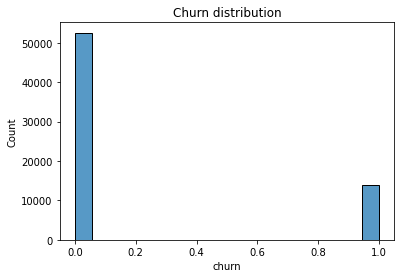

In [84]:
sns.histplot(final_set['churn'])
plt.title("Churn distribution")

It can be observed that the data is little imbalanced. Customers who exited are 13907 and who did not exit are 52562.(1:4 ratio).

Text(0.5, 1.0, 'churn ratio')

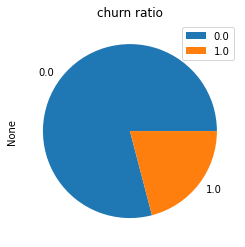

In [151]:
churners.groupby('churn').size().plot(kind='pie', legend=True)
plt.title('churn ratio')

## Categorical columns
User intake,
user_has_outgoing_calls,
user_has_outgoing_sms,
user_use_gprs, 
user_does_reload. 

### User Intake

It indicates if he/she is a new user in that month.



In [85]:
print(len(final_set[final_set['user_intake_8']==1]))
print(len(final_set[final_set['user_intake_7']==1]))
print(len(final_set[final_set['user_intake_6']==1]))

2134
1349
1150




*   There are 2134 new users in month 8.
*   There are 1349 new users in month 7.


*   There are 1150 new users in month 6.







Very few new users who registered in 8th month exited.

New customers who registered in 6th and 7th month did not prefer to exit the company.

Text(0.5, 1.0, 'churn vs user_intake_8')

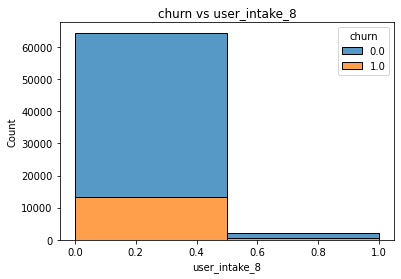

In [86]:
sns.histplot(binwidth=0.5, x="user_intake_8", hue="churn", data=final_set, stat="count", multiple="stack")
plt.title("churn vs user_intake_8")

Text(0.5, 1.0, 'churn vs user_intake_7')

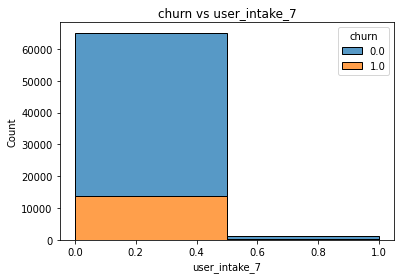

In [87]:
sns.histplot(binwidth=0.5, x="user_intake_7", hue="churn", data=final_set, stat="count", multiple="stack")
plt.title("churn vs user_intake_7")

Text(0.5, 1.0, 'churn vs user_intake_6')

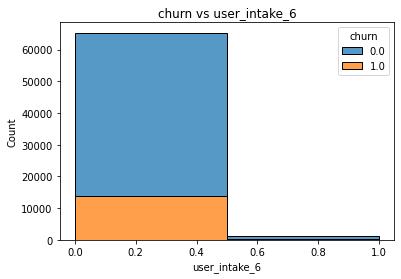

In [88]:
sns.histplot(binwidth=0.5, x="user_intake_6", hue="churn", data=final_set, stat="count", multiple="stack")
plt.title("churn vs user_intake_6")

### User_has_outgoing_calls


It indicates whether the customer made atleast one call in that month or not.( To derive if he is an active user or not).

0 indicates user did not make atleast one call

1 indicates user did make atleast one call.

Three months data display the same trend. Customers who did not make atleast one call in that month tend to exit the company more than the active customers.



Text(0.5, 1.0, 'churn vs user_has_outgoing_calls_8')

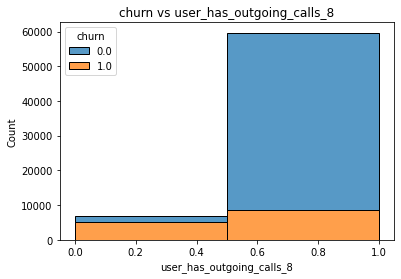

In [89]:
sns.histplot(binwidth=0.5, x="user_has_outgoing_calls_8", hue="churn", data=final_set, stat="count", multiple="stack")
plt.title("churn vs user_has_outgoing_calls_8")

Text(0.5, 1.0, 'churn vs user_has_outgoing_calls_7')

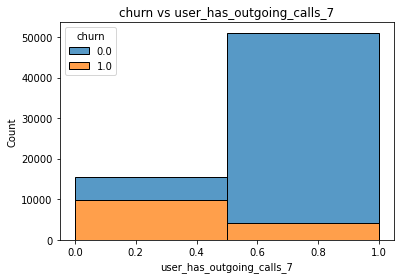

In [90]:
sns.histplot(binwidth=0.5, x="user_has_outgoing_calls_7", hue="churn", data=final_set, stat="count", multiple="stack")
plt.title("churn vs user_has_outgoing_calls_7")

Text(0.5, 1.0, 'churn vs user_has_outgoing_calls_6')

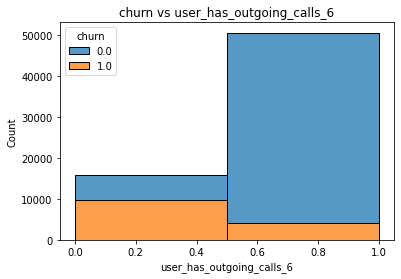

In [91]:
sns.histplot(binwidth=0.5, x="user_has_outgoing_calls_6", hue="churn", data=final_set, stat="count", multiple="stack")
plt.title("churn vs user_has_outgoing_calls_6")

### User_has_outgoing sms
 

It indicates whether the customer sent atleast one sms in that month or not.( To derive if he is an active user or not).

0 indicates user did not send atleast one sms.

1 indicates user sent atleast one sms.

Three months data display the same trend. Customers who did send atleast one sms in that month tend to exit more than the active customers.

Text(0.5, 1.0, 'churn vs user_has_outgoing_sms_8')

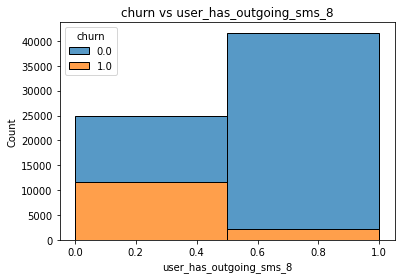

In [92]:
sns.histplot(binwidth=0.5, x="user_has_outgoing_sms_8", hue="churn", data=final_set, stat="count", multiple="stack")
plt.title("churn vs user_has_outgoing_sms_8")

Text(0.5, 1.0, 'churn vs user_has_outgoing_sms_7')

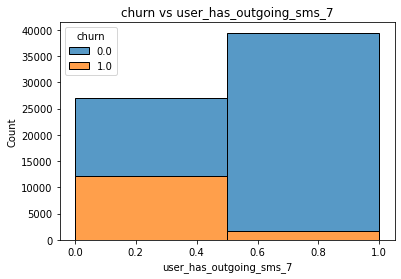

In [93]:
sns.histplot(binwidth=0.5, x="user_has_outgoing_sms_7", hue="churn", data=final_set, stat="count", multiple="stack")
plt.title("churn vs user_has_outgoing_sms_7")

Text(0.5, 1.0, 'churn vs user_has_outgoing_sms_6')

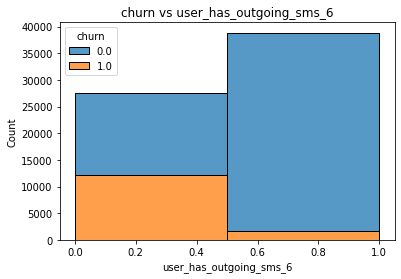

In [94]:
sns.histplot(binwidth=0.5, x="user_has_outgoing_sms_6", hue="churn", data=final_set, stat="count", multiple="stack")
plt.title("churn vs user_has_outgoing_sms_6")

### User_does_reload

It indicates whether the customer made atleast one recharge in that month or not.( To derive if he is an active user or not).

0 indicates user did not recharge one time also.

1 indicates user did recharge.


In the 6th and 7th month, customers who recharged atleast once did not leave the company.
In the 8th month, both types the customers, who recharged and who did not recharge exited company in the same ratio.

Text(0.5, 1.0, 'churn vs user_does_reload_8')

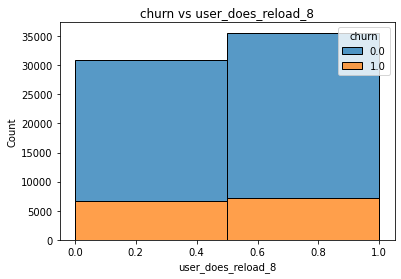

In [95]:
sns.histplot(binwidth=0.5, x="user_does_reload_8", hue="churn", data=final_set, stat="count", multiple="stack")
plt.title("churn vs user_does_reload_8")

Text(0.5, 1.0, 'churn vs user_does_reload_7')

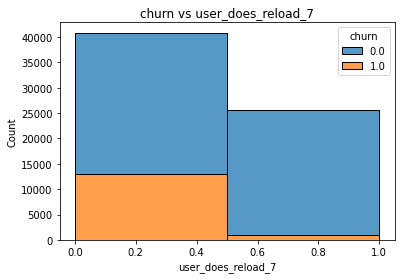

In [96]:
sns.histplot(binwidth=0.5, x="user_does_reload_7", hue="churn", data=final_set, stat="count", multiple="stack")
plt.title("churn vs user_does_reload_7")

Text(0.5, 1.0, 'churn vs user_does_reload_6')

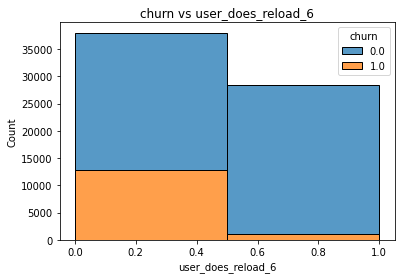

In [97]:
sns.histplot(binwidth=0.5, x="user_does_reload_6", hue="churn", data=final_set, stat="count", multiple="stack")
plt.title("churn vs user_does_reload_6")

### user_use_gprs    

It indicates whether the customer used data in that month or not.( To derive if he is an active user or not).

0 indicates user did not use the data  at least once..

1 indicates user did use the data.
There are few customers who did not use the data and they did not exit the company. 
Most of the customers who were frequent users of data cancelled their plans.

Text(0.5, 1.0, 'churn vs user_use_gprs_8')

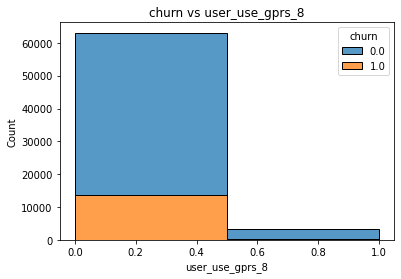

In [98]:
sns.histplot(binwidth=0.5, x="user_use_gprs_8", hue="churn", data=final_set, stat="count", multiple="stack")
plt.title("churn vs user_use_gprs_8")

Text(0.5, 1.0, 'churn vs user_use_gprs_7')

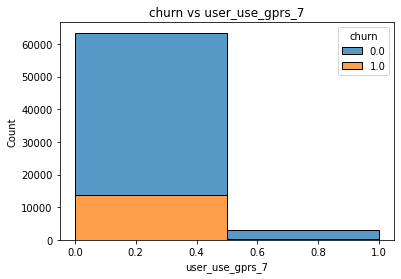

In [99]:
sns.histplot(binwidth=0.5, x="user_use_gprs_7", hue="churn", data=final_set, stat="count", multiple="stack")
plt.title("churn vs user_use_gprs_7")

Text(0.5, 1.0, 'churn vs user_use_gprs_6')

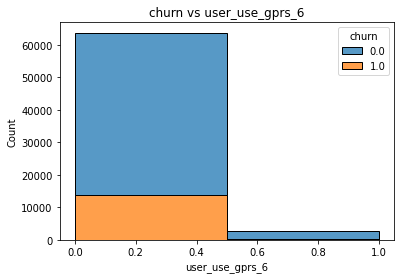

In [100]:
sns.histplot(binwidth=0.5, x="user_use_gprs_6", hue="churn", data=final_set, stat="count", multiple="stack")
plt.title("churn vs user_use_gprs_6")

### Seperating categorical data

In [101]:
# There are 15 categorical columns in the dataset
cat_cols=['user_intake_8','user_intake_7','user_intake_6',
          'user_has_outgoing_calls_8','user_has_outgoing_calls_7','user_has_outgoing_calls_6',
          'user_has_outgoing_sms_8','user_has_outgoing_sms_7','user_has_outgoing_sms_6',
          'user_does_reload_8','user_does_reload_7','user_does_reload_6',
          'user_use_gprs_8','user_use_gprs_7','user_use_gprs_6'
          ]

In [102]:
# Create a new dataframe, sample_cat_set with only categorical columns
sample_cat_set=pd.DataFrame()
for i in cat_cols:
  sample_cat_set[i]=final_set[i]
sample_cat_set.shape

(66469, 15)

In [103]:
#Dropping categorical columns from original dataset. Now were are left only with 173 continuous varibales
final_set=final_set.drop(['user_intake_8','user_intake_7','user_intake_6',
          'user_has_outgoing_calls_8','user_has_outgoing_calls_7','user_has_outgoing_calls_6',
          'user_has_outgoing_sms_8','user_has_outgoing_sms_7','user_has_outgoing_sms_6',
          'user_does_reload_8','user_does_reload_7','user_does_reload_6',
          'user_use_gprs_8','user_use_gprs_7','user_use_gprs_6'],axis=1)
final_set.shape

(66469, 173)

## Continuous columns




### Calls outgoing inactive days

 **Calls_outgoing_inactive_days** : Number of days without outgoing calls

 **calls_outgoing_to_onnet_inactive_days** : Number of days without outgoing call to on-net

 **calls_outgoing_to_offnet_inactive_days**:Number of days without outgoing call to off-net

 **calls_outgoing_to_abroad_inactive_days**:Number of days without outgoing call to other countries


 The above 4 columns indicate the  call activity data. Customers who have are leaving the company have more number of inactive days in all the cases. Similar pattern can be observed.

 Also it can be observed that there is high correlation of 1 among these columns. 
 
 Hence retaining calls_outgoing_inactive_days, other 3 can be dropped.

In [ ]:
calls_outgoing=['calls_outgoing_inactive_days_6','calls_outgoing_to_onnet_inactive_days_6','calls_outgoing_to_offnet_inactive_days_6','calls_outgoing_to_abroad_inactive_days_6']

Correlation Heat Map



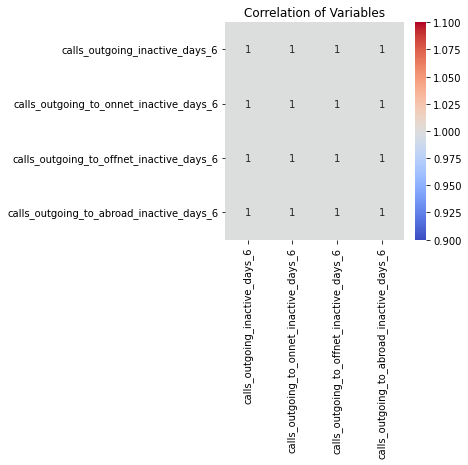

In [ ]:
print('Correlation Heat Map')
print()
plt.figure(figsize = (4,4))
sns.heatmap(pd.DataFrame(final_set, columns=calls_outgoing).corr(), annot=True,cmap='coolwarm')
plt.title('Correlation of Variables')
plt.show()

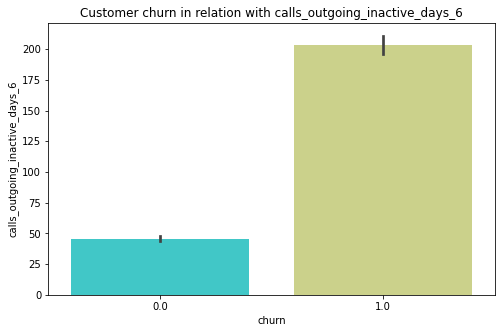

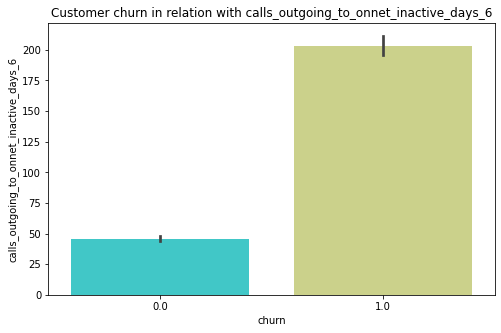

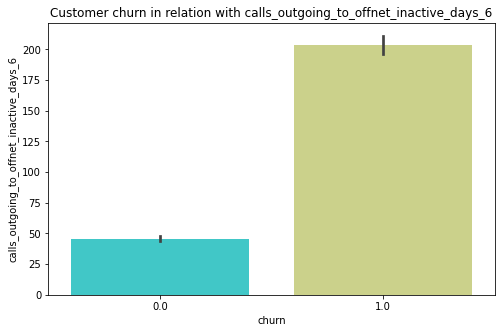

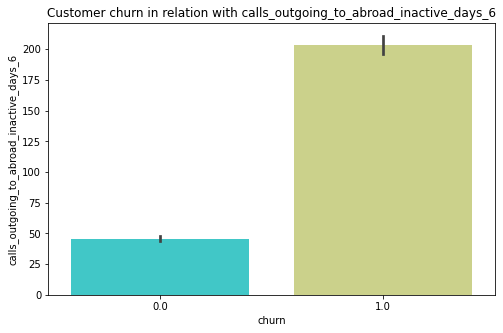

In [ ]:
for i in calls_outgoing:
  plt.figure(figsize=(8,5))
  sns.barplot(x='churn',y=i,data=final_set, palette='rainbow')
  plt.title("Customer churn in relation with " +i)

In [119]:
# Retaining calls_outgoing_inactive_days and dropping other columns in all the 4 months. 
final_set=final_set.drop(['calls_outgoing_to_onnet_inactive_days_6','calls_outgoing_to_offnet_inactive_days_6','calls_outgoing_to_abroad_inactive_days_6',
                          'calls_outgoing_to_onnet_inactive_days_7','calls_outgoing_to_offnet_inactive_days_7','calls_outgoing_to_abroad_inactive_days_7',
                          'calls_outgoing_to_onnet_inactive_days_8','calls_outgoing_to_offnet_inactive_days_8','calls_outgoing_to_abroad_inactive_days_8'],axis=1)
final_set.shape

(66469, 164)

### sms outgoing inactive days

**sms_outgoing_inactive_days** : Number of days without outgoing sms message

 **sms_outgoing_to_onnet_inactive_days** : Number of days without outgoing sms message to on-net

 **sms_outgoing_to_offnet_inactive_days**:Number of days without outgoing sms message to off-net

 **sms_outgoing_to_abroad_inactive_days**:Number of days without outgoing sms message to other countries


 The above 4 columns indicate the  outgoing sms activity. Customers who have are leaving the company have more number of inactive days in all the cases. Similar pattern can be observed.

 Also it can be observed that there is high correlation of 1 among these columns. 
 
 Hence sms_outgoing_inactive_days is retained and other 3 columns are dropped.

In [ ]:
sms_outgoing=['sms_outgoing_inactive_days_6','sms_outgoing_to_onnet_inactive_days_6','sms_outgoing_to_offnet_inactive_days_6','sms_outgoing_to_abroad_inactive_days_6']

Correlation Heat Map



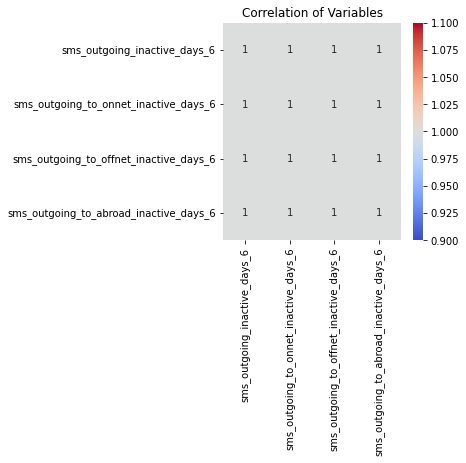

In [ ]:
print('Correlation Heat Map')
print()
plt.figure(figsize = (4,4))
sns.heatmap(pd.DataFrame(final_set, columns=sms_outgoing).corr(), annot=True,cmap='coolwarm')
plt.title('Correlation of Variables')
plt.show()

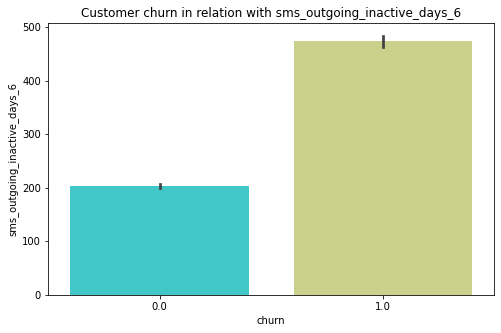

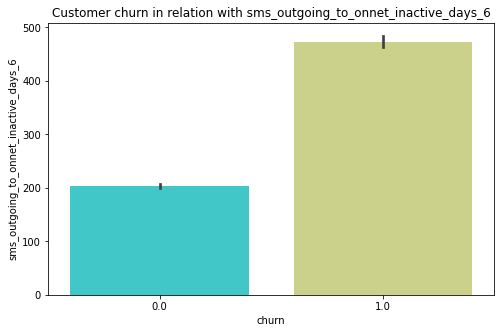

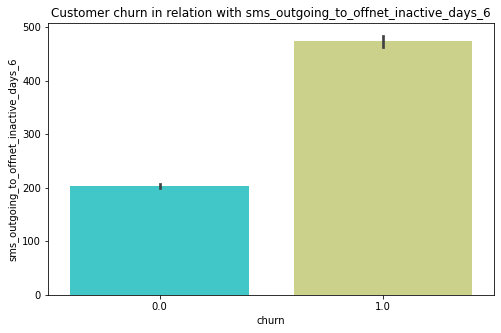

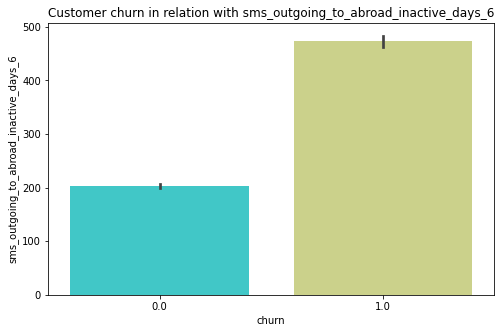

In [ ]:
for i in sms_outgoing:
  plt.figure(figsize=(8,5))
  #sns.stripplot(x='churn', y=i, data=final_set, jitter=True,dodge=True, palette='viridis')
  sns.barplot(x='churn',y=i,data=final_set, palette='rainbow')
  plt.title("Customer churn in relation with " +i)

In [120]:
# Retaining sms_outgoing_inactive_days column and dropping other columns for all months.
final_set=final_set.drop(['sms_outgoing_to_onnet_inactive_days_6','sms_outgoing_to_offnet_inactive_days_6','sms_outgoing_to_abroad_inactive_days_6',
                          'sms_outgoing_to_onnet_inactive_days_7','sms_outgoing_to_offnet_inactive_days_7','sms_outgoing_to_abroad_inactive_days_7',
                          'sms_outgoing_to_onnet_inactive_days_8','sms_outgoing_to_offnet_inactive_days_8','sms_outgoing_to_abroad_inactive_days_8'],axis=1)
final_set.shape

(66469, 155)

### sms_outgoing_count

**sms_outgoing_to_offnet_count** : Number of outgoing sms messages to off-net

**sms_outgoing_to_offnet_spendings** : Amount spent on outgoing sms messages to off-net

**sms_outgoing_count** : Number of outgoing sms messages in a month.

**last_100_sms_outgoing_to_offnet_count** : Number of SMS messages to off-net over 100 days.



All the columns indicate the information on outgoing sms of the customer and also similar patterns can be observed. Customers who exited has less sms outgoing count.

Hence sms_outgoing_count column will be enough and rest can be dropped.

Text(0.5, 1.0, 'churn vs sms_outgoing_to_offnet_count_8 ')

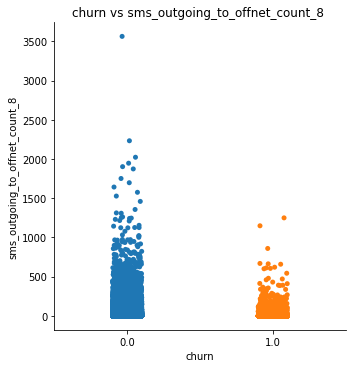

In [104]:
sns.catplot(x="churn", y="sms_outgoing_to_offnet_count_8", data=final_set)
plt.title('churn vs sms_outgoing_to_offnet_count_8 ')

Text(0.5, 1.0, 'churn vs sms_outgoing_to_offnet_spendings_8 ')

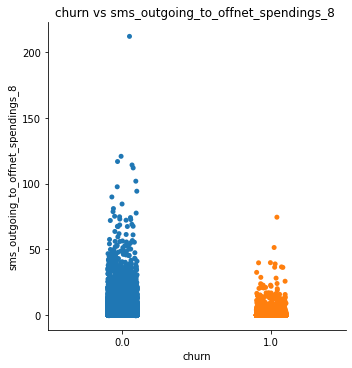

In [108]:
sns.catplot(x="churn", y="sms_outgoing_to_offnet_spendings_8", data=final_set)
plt.title('churn vs sms_outgoing_to_offnet_spendings_8 ')

Text(0.5, 1.0, 'churn vs sms_outgoing_count_8 ')

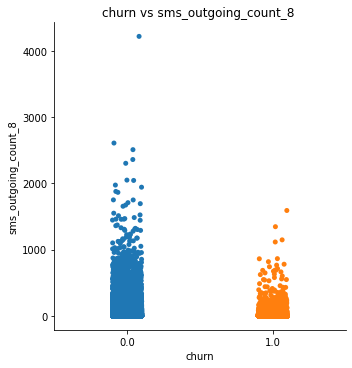

In [109]:
sns.catplot(x="churn", y="sms_outgoing_count_8", data=final_set)
plt.title('churn vs sms_outgoing_count_8 ')

Text(0.5, 1.0, 'churn vs last_100_sms_outgoing_to_offnet_count_8 ')

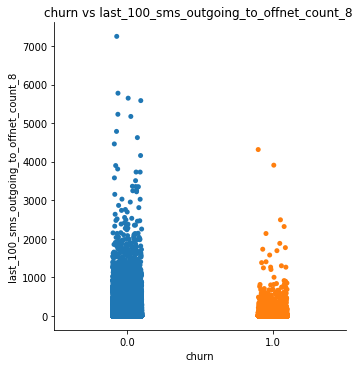

In [110]:
sns.catplot(x="churn", y="last_100_sms_outgoing_to_offnet_count_8", data=final_set)
plt.title('churn vs last_100_sms_outgoing_to_offnet_count_8 ')

In [121]:
# Retaining sms_outgoing_count and dropping other columns in all 3 months.
final_set=final_set.drop(['sms_outgoing_to_offnet_count_8','sms_outgoing_to_offnet_spendings_8','last_100_sms_outgoing_to_offnet_count_8',
                          'sms_outgoing_to_offnet_count_7','sms_outgoing_to_offnet_spendings_7','last_100_sms_outgoing_to_offnet_count_7',
                          'sms_outgoing_to_offnet_count_6','sms_outgoing_to_offnet_spendings_6','last_100_sms_outgoing_to_offnet_count_6',],axis=1)
final_set.shape

(66469, 146)

### Gprs_usage

**gprs_usage** : Number of kb used

**gprs_session_count** : Number of data connections

**last_100_gprs_usage** : Number of kb used over last 100 days

Customers who exit the companyused very less data. Similar pattern is observed in all the three columns.

Hence retaining gprs_usage, other columns can be dropped.

Text(0.5, 1.0, 'churn vs gprs_usage_8')

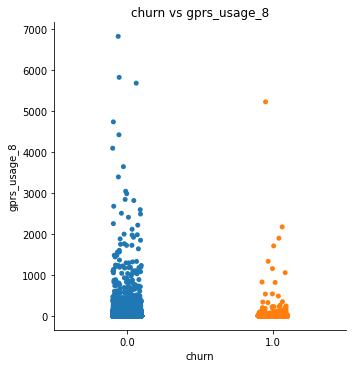

In [111]:
sns.catplot(x="churn", y="gprs_usage_8", data=final_set)
plt.title('churn vs gprs_usage_8')

Text(0.5, 1.0, 'churn vs gprs_session_count_8')

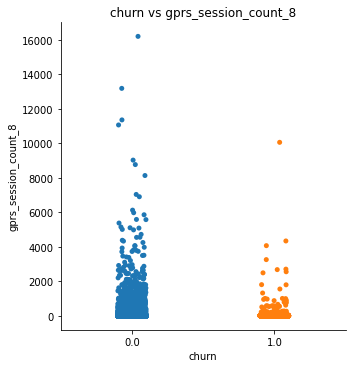

In [112]:
sns.catplot(x="churn", y="gprs_session_count_8", data=final_set)
plt.title('churn vs gprs_session_count_8')

Text(0.5, 1.0, 'churn vs last_100_gprs_usage_8')

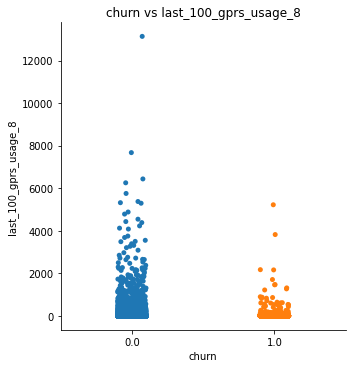

In [113]:
sns.catplot(x="churn", y="last_100_gprs_usage_8", data=final_set)
plt.title('churn vs last_100_gprs_usage_8')

In [122]:
# Retaining gprs_usage and dropping other columns in all 3 months.
final_set=final_set.drop(['last_100_gprs_usage_8','gprs_session_count_8',
                          'last_100_gprs_usage_7','gprs_session_count_7',
                          'last_100_gprs_usage_6','gprs_session_count_6',],axis=1)
final_set.shape

(66469, 140)

### Calls outgoing duration







**calls_outgoing_to_offnet_duration**: Duration of all outgoing calls to off-net

**last_100_calls_outgoing_to_offnet_duration**: Calls outgoing to off-net duration over last 100 days

**calls_outgoing_to_offnet_spendings**: Amount spent on outgoing calls to off-net

**calls_outgoing_duration**: Duration of all outgoing calls

Customers who exited the comapany have very less outgoing duration. Same pattern is observed in the displayed columns and they all indicate information on the outgoing calls.
Hence to capture the pattern, calls_outgoing_duration can be retained and other columns can be dropped.

In [ ]:
calls_duration=['calls_outgoing_to_offnet_duration_8','last_100_calls_outgoing_to_offnet_duration_8','calls_outgoing_to_offnet_spendings_8',
                'calls_outgoing_duration_8']

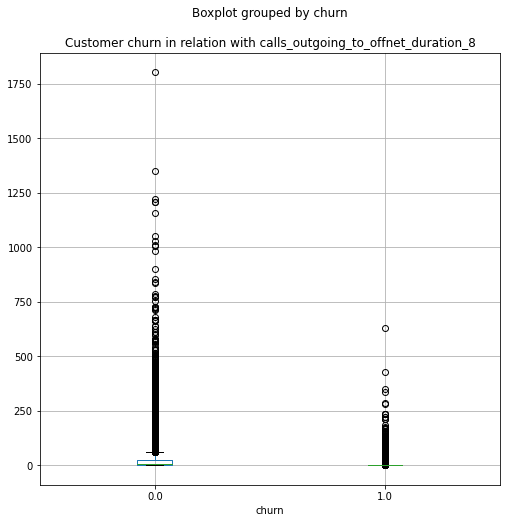

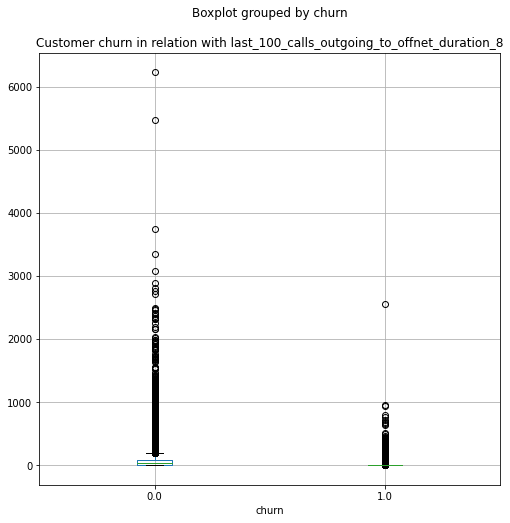

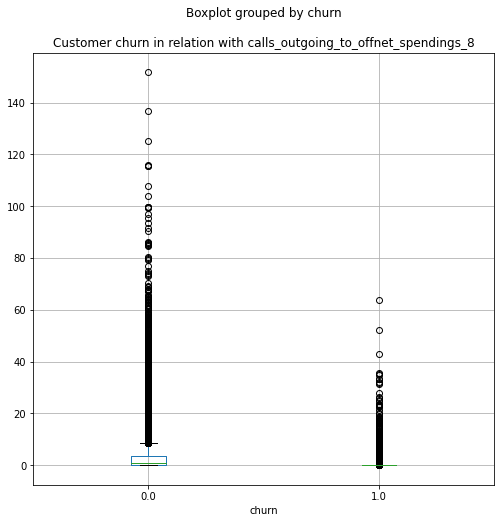

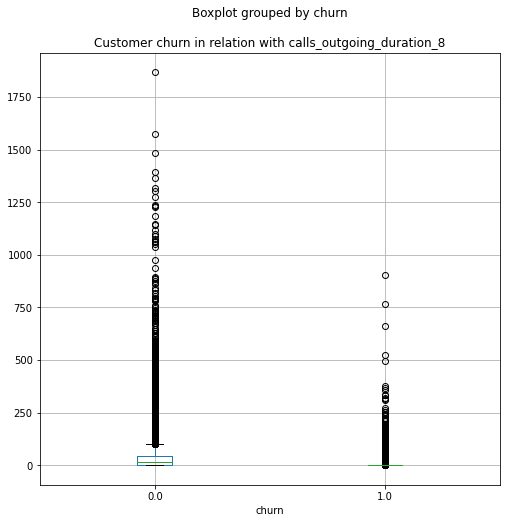

In [ ]:
for i in calls_duration:
  #sns.stripplot(x='churn', y=i, data=final_set, jitter=True,dodge=True, palette='viridis')
  final_set.boxplot(column=i,by='churn',figsize=(8,8))
  plt.title("Customer churn in relation with " +i)

Correlation Heat Map



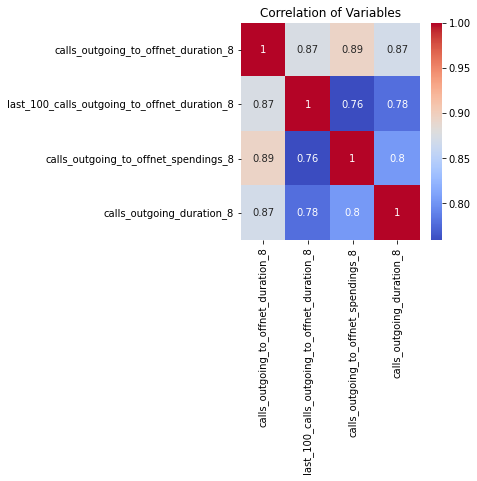

In [ ]:
print('Correlation Heat Map')
print()
plt.figure(figsize = (4,4))
sns.heatmap(pd.DataFrame(final_set, columns=calls_duration).corr(), annot=True,cmap='coolwarm')
plt.title('Correlation of Variables')
plt.show()

In [123]:
final_set=final_set.drop(['calls_outgoing_to_offnet_duration_8','last_100_calls_outgoing_to_offnet_duration_8','calls_outgoing_to_offnet_spendings_8',
                          'calls_outgoing_to_offnet_duration_7','last_100_calls_outgoing_to_offnet_duration_7','calls_outgoing_to_offnet_spendings_7',
                          'calls_outgoing_to_offnet_duration_6','last_100_calls_outgoing_to_offnet_duration_6','calls_outgoing_to_offnet_spendings_6'],axis=1)
final_set.shape

(66469, 131)

### User_lifetime

There are two cases.


1. Customers who registered with network before the 6th month and continuing with it.

2. Customers who registered with network before the 6th month, discontinued it and took another plan.

In [124]:
# Column information is in days. Divided by 31 to get months count.
final_set['user_lifetime_8']=final_set['user_lifetime_8']/31
final_set['user_lifetime_7']=final_set['user_lifetime_7']/31
final_set['user_lifetime_6']=final_set['user_lifetime_6']/31

In [125]:
user_lifetime=list(range(66469))
for i in range(len(final)):
  if(final_set.iloc[i]['user_lifetime_7']-final_set.iloc[i]['user_lifetime_6']>1):
    if(final_set.iloc[i]['user_lifetime_8']-final_set.iloc[i]['user_lifetime_7']>1): 
      user_lifetime[i]=final_set.iloc[i]['user_lifetime_8'] # Previous users who continued their plans in all the months.
    else:
      user_lifetime[i]=final_set.iloc[i]['user_lifetime_8']+final_set.iloc[i]['user_lifetime_7'] # Users who exited their old plan in 7th month and took new plan in 8th month(user lifetime for both plans added)
  else:
    user_lifetime[i]=final_set.iloc[i]['user_lifetime_6']+final_set.iloc[i]['user_lifetime_8'] # User who exited their old plan in 6th month and took new plan in 7th month(user lifetime for both plans added)

In [126]:
final_set['user_lifetime']=user_lifetime

In [127]:
# Dropping userlife time data in all three months.
final_set=final_set.drop(['user_lifetime_6','user_lifetime_7','user_lifetime_8'],axis=1)
final_set.shape

(66469, 129)

## Removing correlations.
 After removing columns with similar information, some correlations can be still observed. The dataset still contains 129 colomns which will lead to compleity while modeling.

 Hence to reduce the dimensions, other columns displaying multi collinearity can be dropped.


In [114]:
# Dropping columns with similar information found above
df_8_continuous=df_8.drop(['month_8','user_account_id','user_intake_8','user_has_outgoing_calls_8','user_has_outgoing_sms_8','user_use_gprs_8', 'user_does_reload_8',
                           'calls_outgoing_to_onnet_inactive_days_8','calls_outgoing_to_offnet_inactive_days_8','calls_outgoing_to_abroad_inactive_days_8',
                           'sms_outgoing_to_onnet_inactive_days_8','sms_outgoing_to_offnet_inactive_days_8','sms_outgoing_to_abroad_inactive_days_8',
                           'sms_outgoing_to_offnet_count_8','sms_outgoing_to_offnet_spendings_8','last_100_sms_outgoing_to_offnet_count_8',
                           'last_100_gprs_usage_8','gprs_session_count_8','calls_outgoing_to_offnet_duration_8','last_100_calls_outgoing_to_offnet_duration_8','calls_outgoing_to_offnet_spendings_8'],axis=1)

We can still see some major correlations in all the months.

Correlation Heat Map



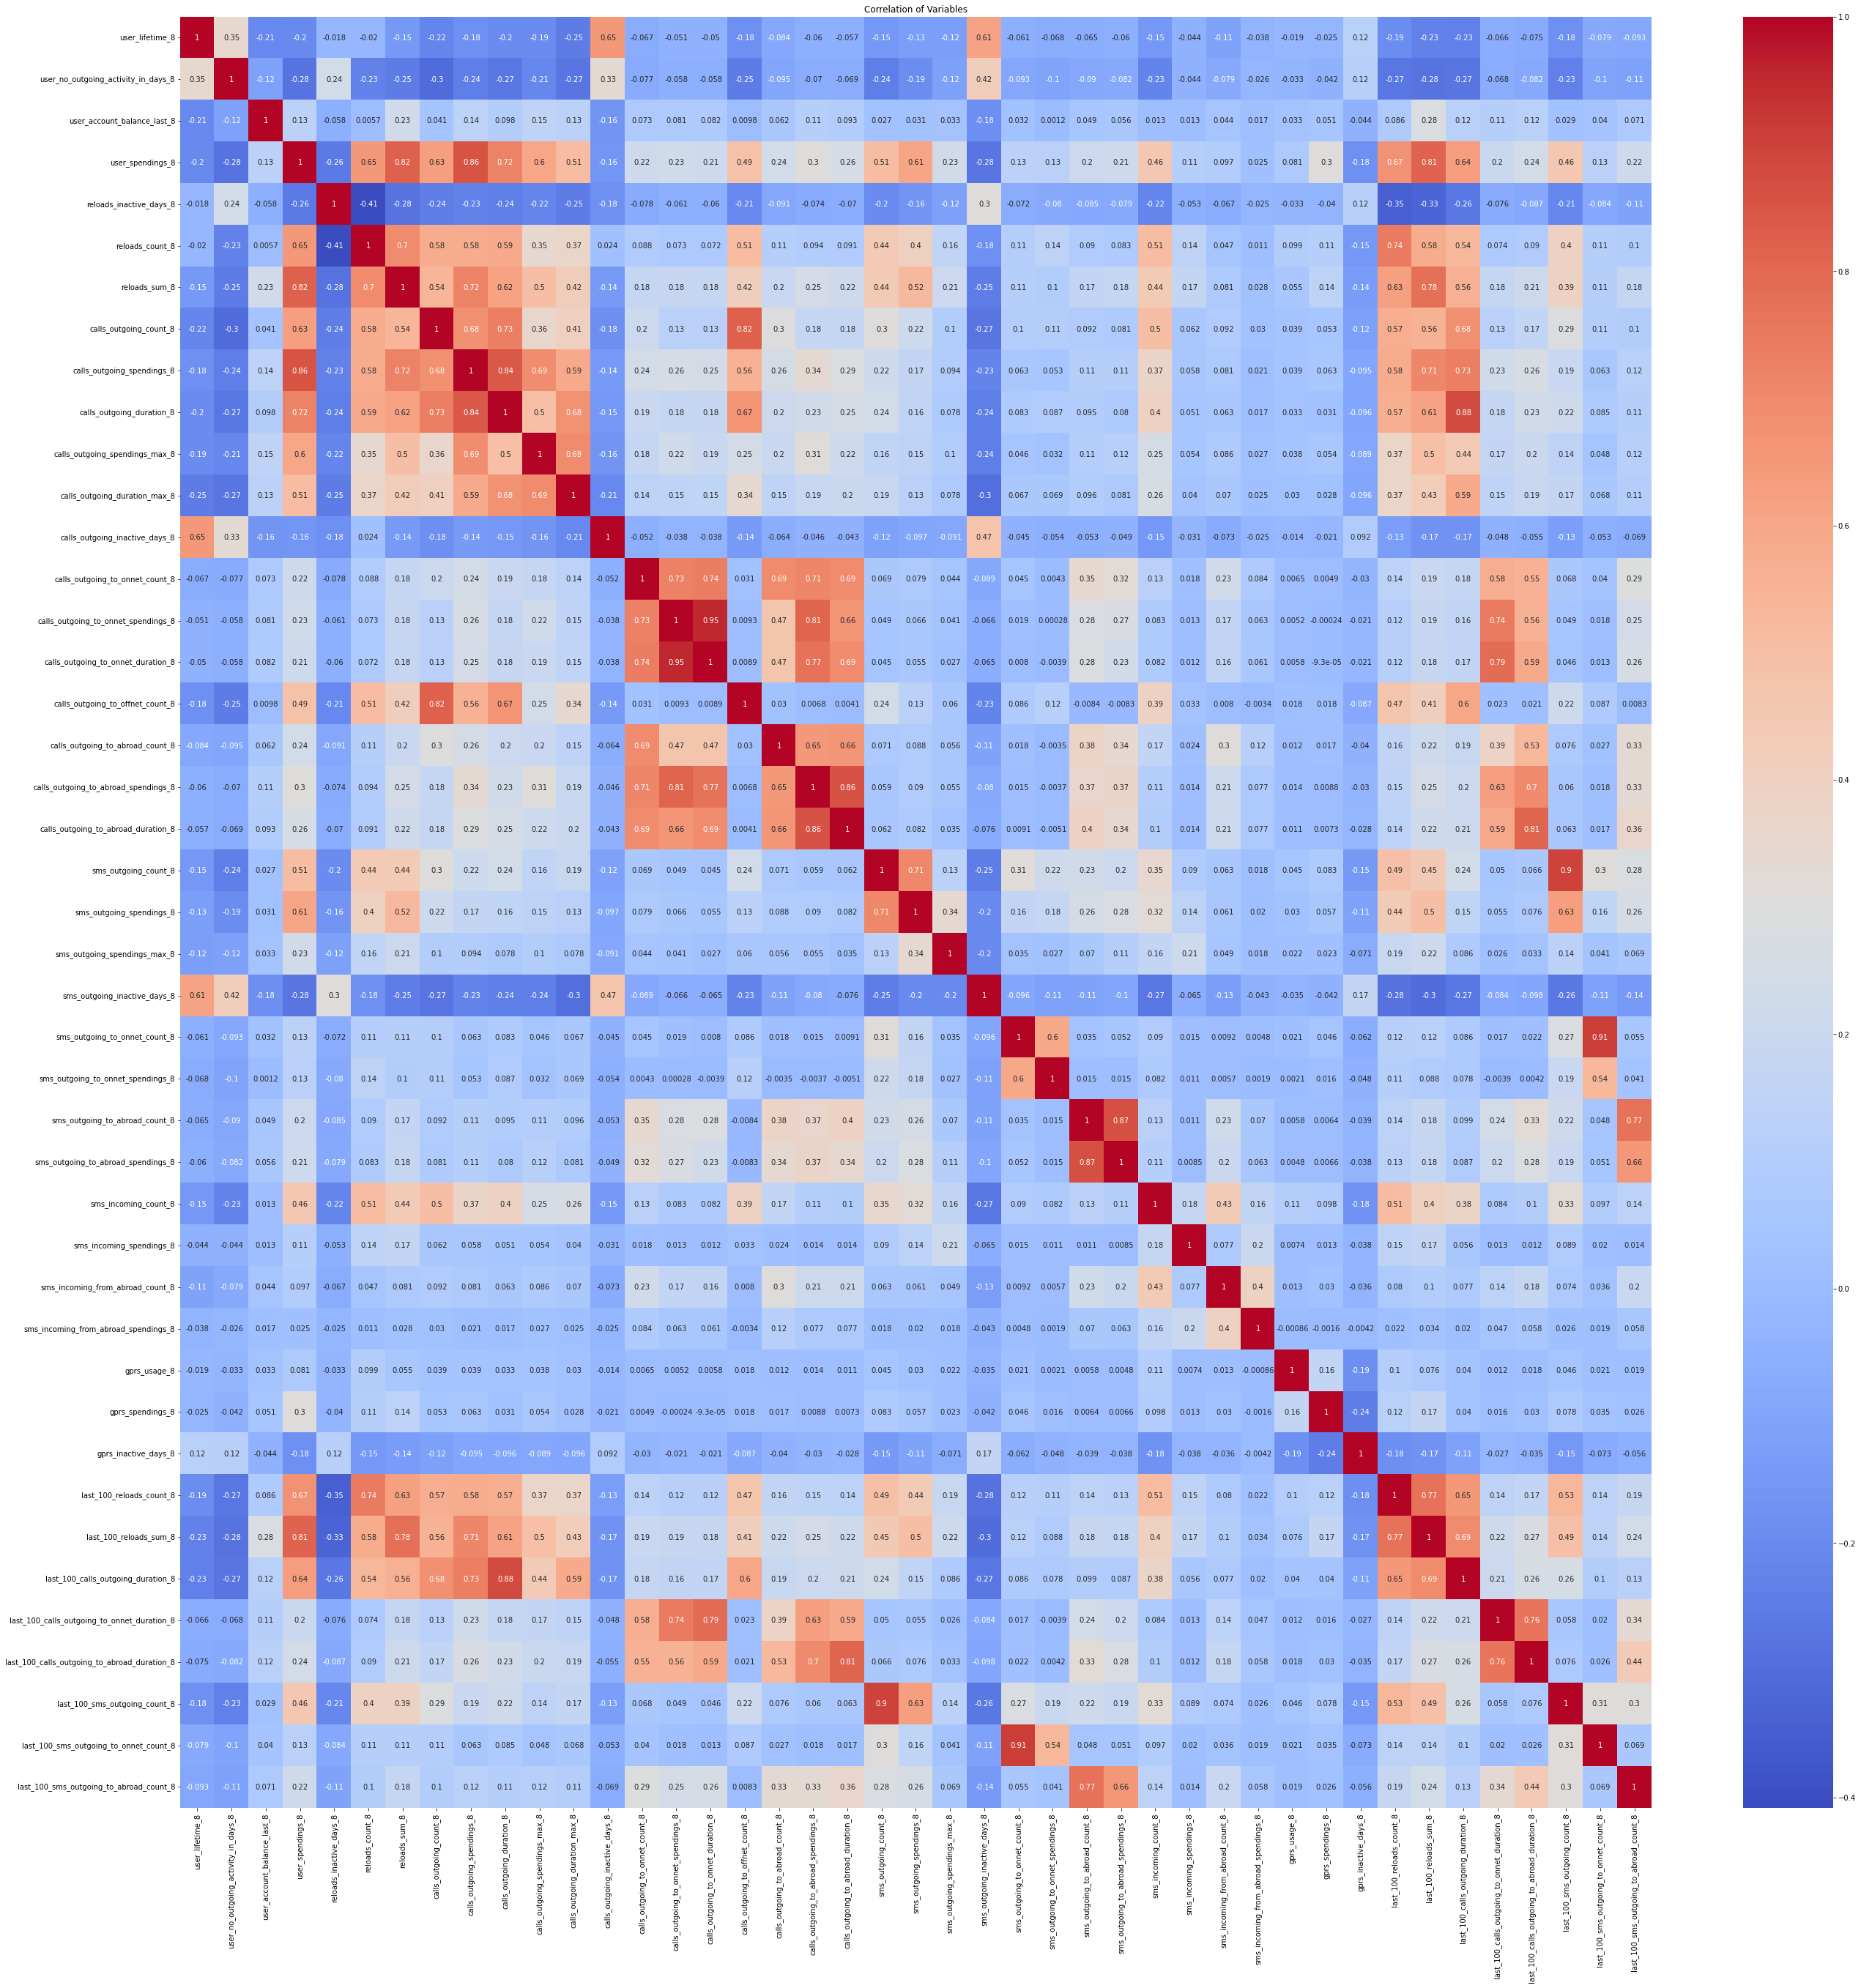

In [115]:
import seaborn as sns
feature_names = list(df_8_continuous.columns[1:len(df_8_continuous.columns)])

print('Correlation Heat Map')
print()
plt.figure(figsize = (45,45))
sns.heatmap(pd.DataFrame(df_8_continuous, columns=feature_names).corr(), annot=True,cmap='coolwarm')
plt.title('Correlation of Variables')
plt.show()

In [128]:
# Unstacking the correlation matrix to see if there are still any major correlations
c = df_8_continuous.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort",ascending=False)

There are still some variables leading to high correlations which can be dropped to reduce dimensions.

In [117]:
print(so[40:70])

user_account_balance_last_8                   user_account_balance_last_8                     1.000000
sms_outgoing_spendings_8                      sms_outgoing_spendings_8                        1.000000
last_100_sms_outgoing_to_abroad_count_8       last_100_sms_outgoing_to_abroad_count_8         1.000000
calls_outgoing_to_onnet_spendings_8           calls_outgoing_to_onnet_duration_8              0.950542
calls_outgoing_to_onnet_duration_8            calls_outgoing_to_onnet_spendings_8             0.950542
last_100_sms_outgoing_to_onnet_count_8        sms_outgoing_to_onnet_count_8                   0.908301
sms_outgoing_to_onnet_count_8                 last_100_sms_outgoing_to_onnet_count_8          0.908301
sms_outgoing_count_8                          last_100_sms_outgoing_count_8                   0.898204
last_100_sms_outgoing_count_8                 sms_outgoing_count_8                            0.898204
last_100_calls_outgoing_duration_8            calls_outgoing_duration_8  

In [129]:
# Initiating target variable
y=final_set['churn']
final_set.drop(['churn'],axis=1,inplace=True)

In [130]:
# calculating VIF for each feature an creating a dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = final_set.columns
  

vif_data["VIF"] = [variance_inflation_factor(final_set.values, i)
                          for i in range(len(final_set.columns))]
  

Vif value greater than 10 indicates multi collinearity. Deleting these columns removes correlation among columns.

In [131]:
# Deleting columns with VIF greater than 10.
x=[]
for i in range(len(vif_data)):
  if(vif_data.iloc[i]['VIF']>=10):
    x.append(vif_data.iloc[i]['feature'])

In [132]:
x

['user_account_balance_last_8',
 'user_spendings_8',
 'reloads_sum_8',
 'calls_outgoing_count_8',
 'calls_outgoing_spendings_8',
 'calls_outgoing_duration_8',
 'calls_outgoing_to_onnet_spendings_8',
 'calls_outgoing_to_onnet_duration_8',
 'calls_outgoing_to_abroad_duration_8',
 'sms_outgoing_count_8',
 'sms_outgoing_spendings_8',
 'sms_outgoing_to_onnet_count_8',
 'sms_outgoing_to_abroad_count_8',
 'gprs_spendings_8',
 'gprs_inactive_days_8',
 'last_100_reloads_count_8',
 'last_100_reloads_sum_8',
 'last_100_calls_outgoing_duration_8',
 'last_100_calls_outgoing_to_onnet_duration_8',
 'last_100_calls_outgoing_to_abroad_duration_8',
 'last_100_sms_outgoing_count_8',
 'last_100_sms_outgoing_to_onnet_count_8',
 'last_100_sms_outgoing_to_abroad_count_8',
 'user_no_outgoing_activity_in_days_7',
 'user_account_balance_last_7',
 'user_spendings_7',
 'reloads_sum_7',
 'calls_outgoing_count_7',
 'calls_outgoing_spendings_7',
 'calls_outgoing_duration_7',
 'calls_outgoing_inactive_days_7',
 'call

In [133]:
final_set=final_set.drop(['user_account_balance_last_8',
 'user_spendings_8',
 'reloads_sum_8',
 'calls_outgoing_count_8',
 'calls_outgoing_spendings_8',
 'calls_outgoing_duration_8',
 'calls_outgoing_to_onnet_spendings_8',
 'calls_outgoing_to_onnet_duration_8',
 'calls_outgoing_to_abroad_duration_8',
 'sms_outgoing_count_8',
 'sms_outgoing_spendings_8',
 'sms_outgoing_to_onnet_count_8',
 'sms_outgoing_to_abroad_count_8',
 'gprs_spendings_8',
 'gprs_inactive_days_8',
 'last_100_reloads_count_8',
 'last_100_reloads_sum_8',
 'last_100_calls_outgoing_duration_8',
 'last_100_calls_outgoing_to_onnet_duration_8',
 'last_100_calls_outgoing_to_abroad_duration_8',
 'last_100_sms_outgoing_count_8',
 'last_100_sms_outgoing_to_onnet_count_8',
 'last_100_sms_outgoing_to_abroad_count_8',
 'user_no_outgoing_activity_in_days_7',
 'user_account_balance_last_7',
 'user_spendings_7',
 'reloads_sum_7',
 'calls_outgoing_count_7',
 'calls_outgoing_spendings_7',
 'calls_outgoing_duration_7',
 'calls_outgoing_inactive_days_7',
 'calls_outgoing_to_onnet_spendings_7',
 'calls_outgoing_to_onnet_duration_7',
 'calls_outgoing_to_offnet_count_7',
 'calls_outgoing_to_abroad_duration_7',
 'sms_outgoing_count_7',
 'sms_outgoing_spendings_7',
 'sms_outgoing_to_onnet_count_7',
 'sms_outgoing_to_abroad_count_7',
 'gprs_spendings_7',
 'gprs_inactive_days_7',
 'last_100_reloads_count_7',
 'last_100_reloads_sum_7',
 'last_100_calls_outgoing_duration_7',
 'last_100_calls_outgoing_to_onnet_duration_7',
 'last_100_calls_outgoing_to_abroad_duration_7',
 'last_100_sms_outgoing_count_7',
 'last_100_sms_outgoing_to_onnet_count_7',
 'last_100_sms_outgoing_to_abroad_count_7',
 'user_no_outgoing_activity_in_days_6',
 'user_account_balance_last_6',
 'user_spendings_6',
 'reloads_sum_6',
 'calls_outgoing_count_6',
 'calls_outgoing_spendings_6',
 'calls_outgoing_duration_6',
 'calls_outgoing_inactive_days_6',
 'calls_outgoing_to_onnet_duration_6',
 'calls_outgoing_to_offnet_count_6',
 'calls_outgoing_to_abroad_duration_6',
 'sms_outgoing_count_6',
 'sms_outgoing_spendings_6',
 'sms_outgoing_to_onnet_count_6',
 'sms_outgoing_to_abroad_count_6',
 'gprs_spendings_6',
 'gprs_inactive_days_6',
 'last_100_reloads_count_6',
 'last_100_reloads_sum_6',
 'last_100_calls_outgoing_duration_6',
 'last_100_calls_outgoing_to_onnet_duration_6',
 'last_100_calls_outgoing_to_abroad_duration_6',
 'last_100_sms_outgoing_count_6',
 'last_100_sms_outgoing_to_onnet_count_6'],axis=1)
final_set.shape

(66469, 55)

We are left with 55 continuous columns and 15 categorical columns.

In [134]:
final_set.shape

(66469, 55)

## Distributions

It can be observed that almost all the continuous features are right skewed. These might be because of the outliers.

One idea is to remove outliers and other is to apply transformations.

Since there are huge number of features, We preferred to go with transformation after splitting the dataset for modeling.

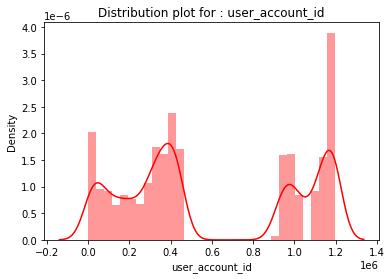

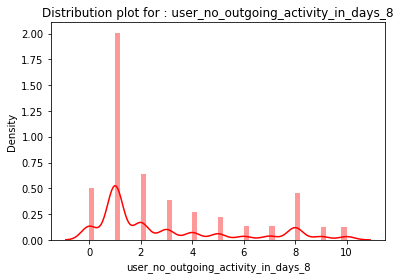

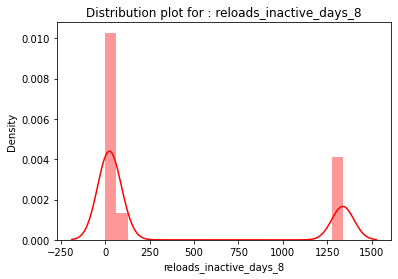

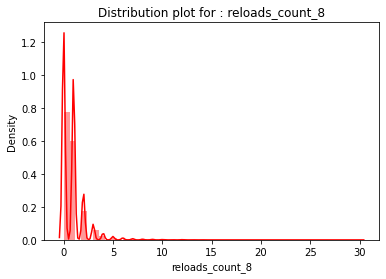

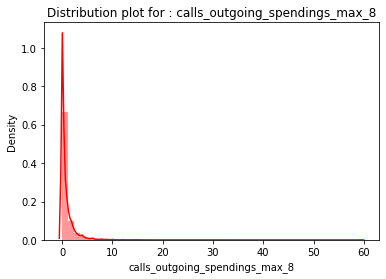

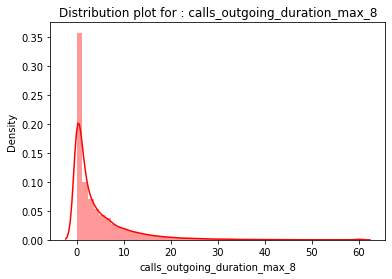

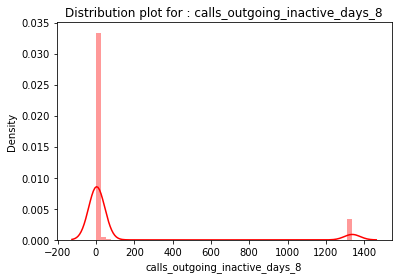

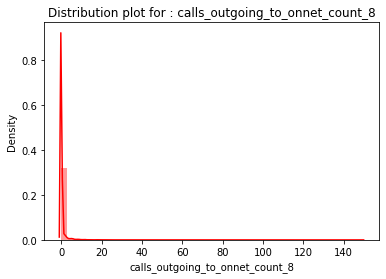

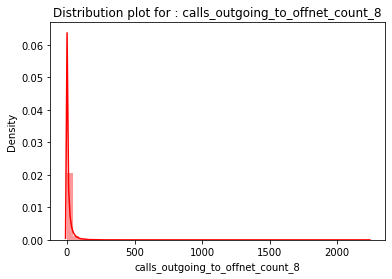

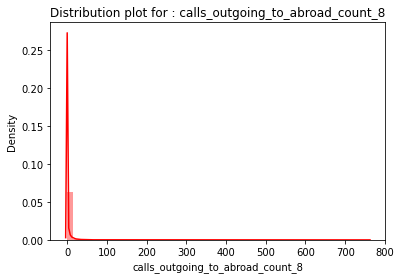

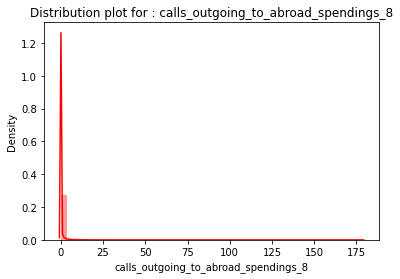

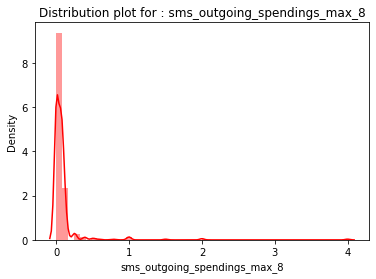

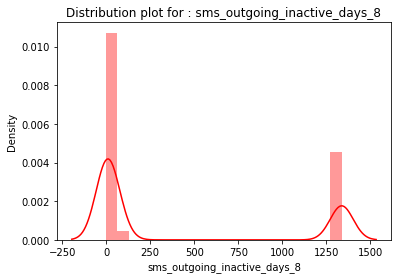

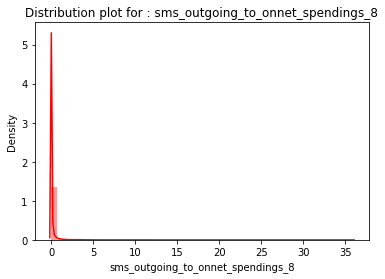

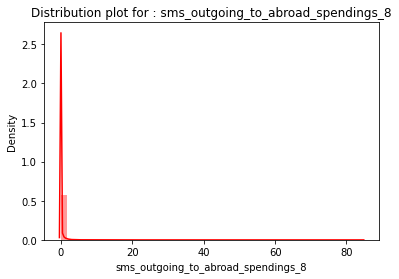

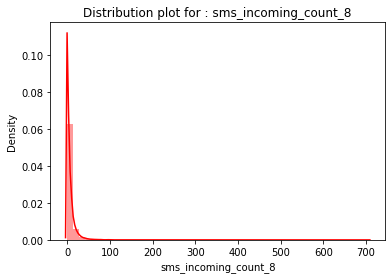

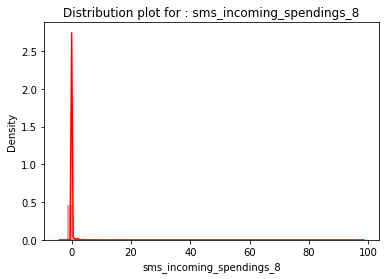

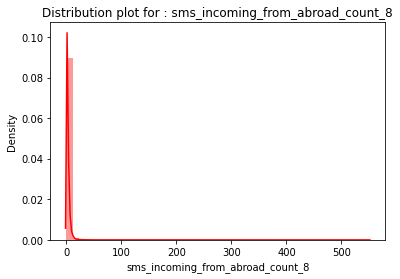

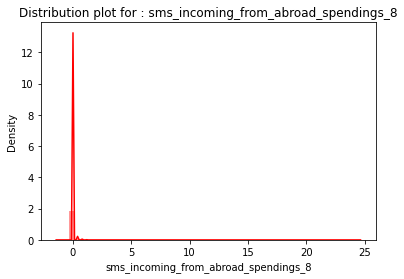

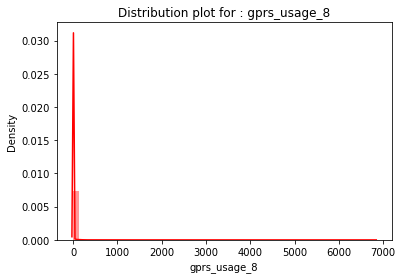

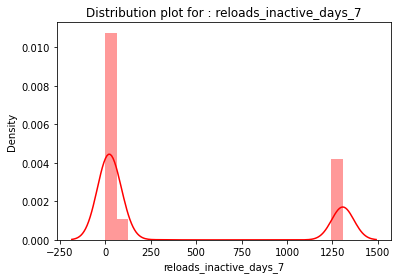

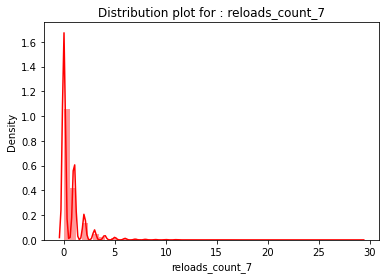

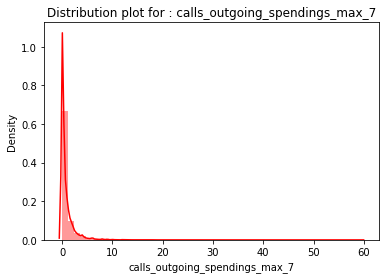

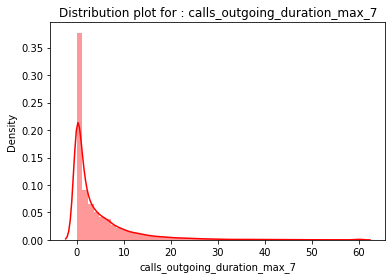

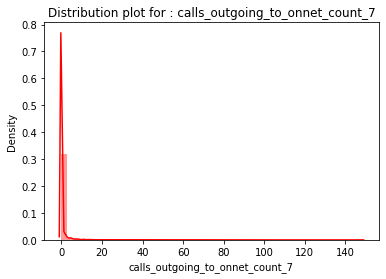

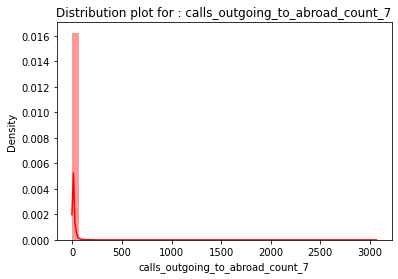

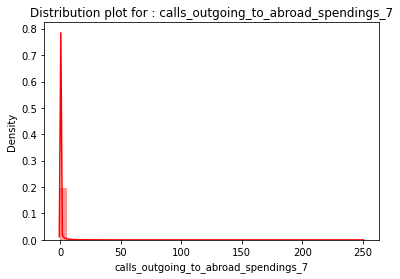

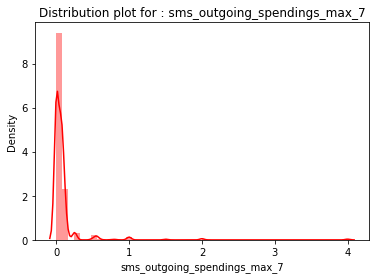

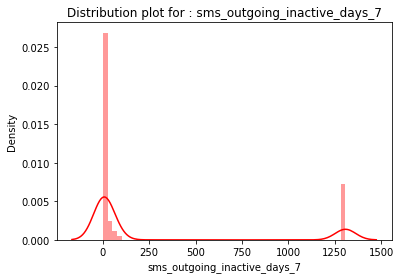

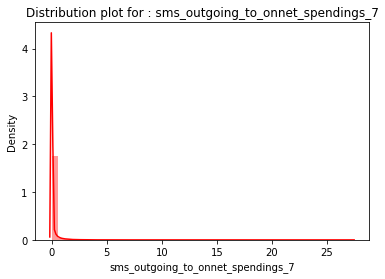

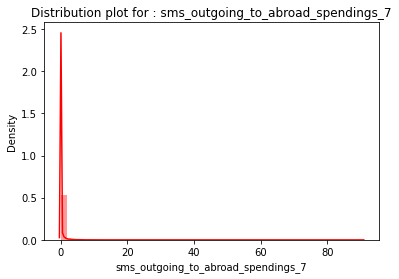

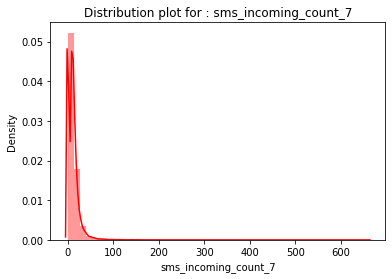

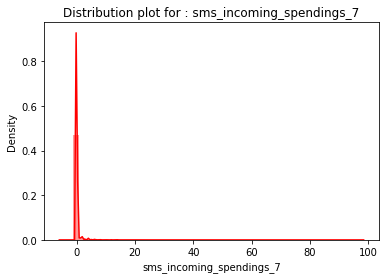

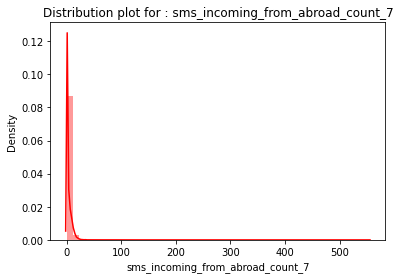

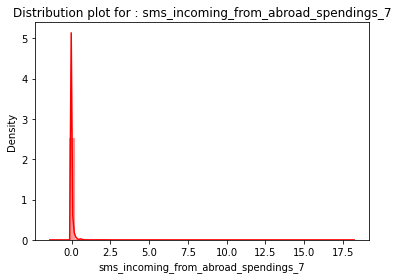

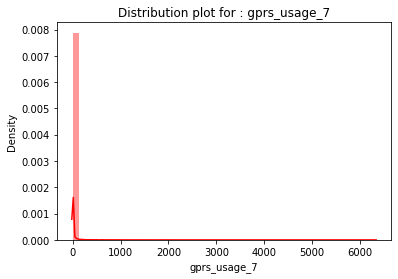

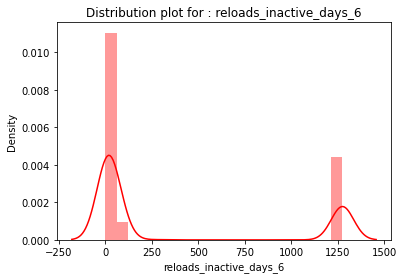

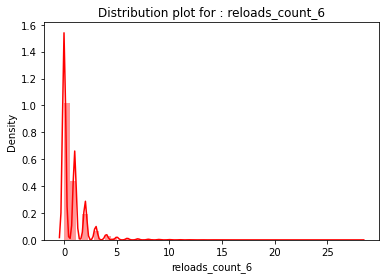

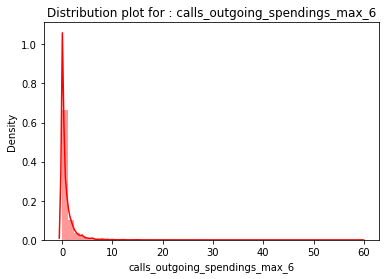

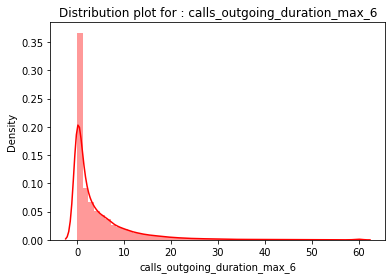

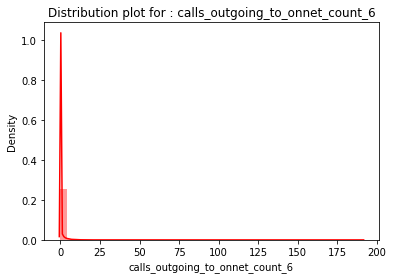

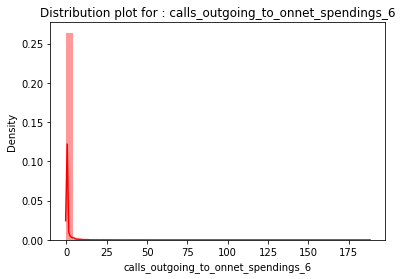

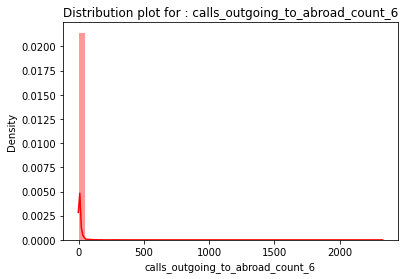

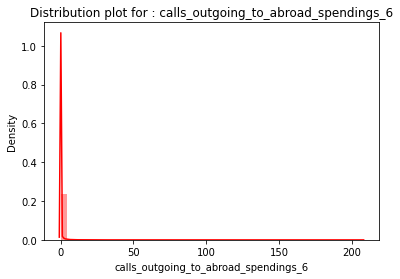

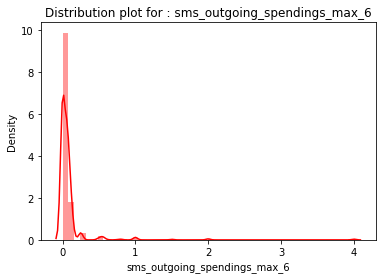

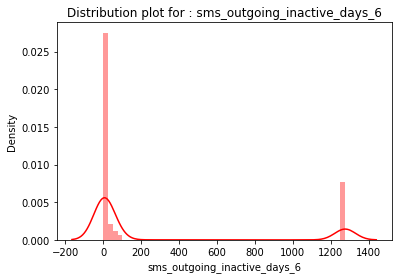

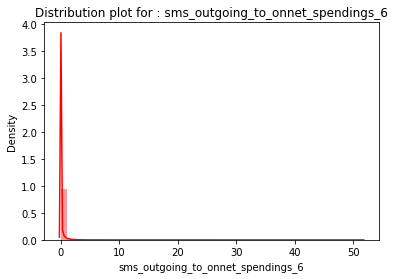

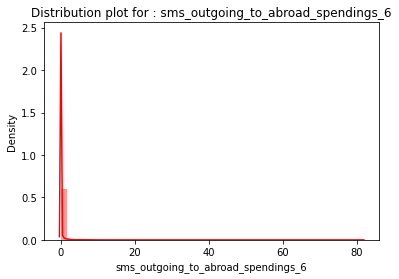

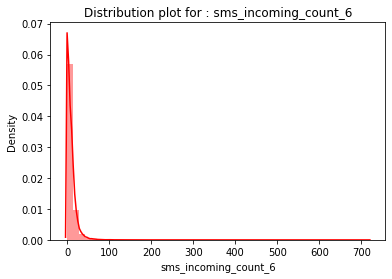

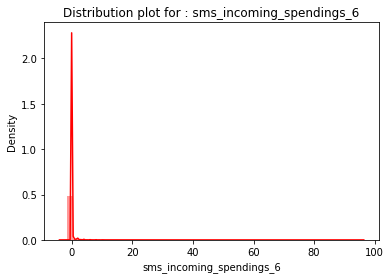

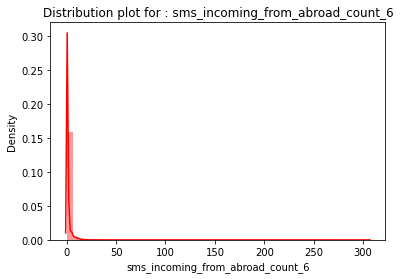

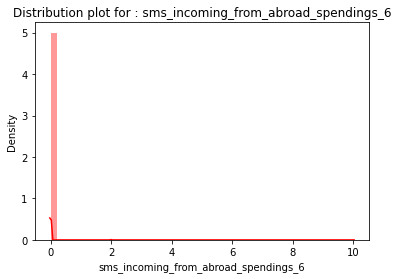

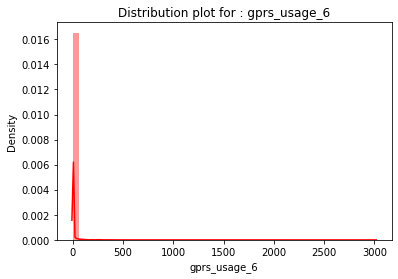

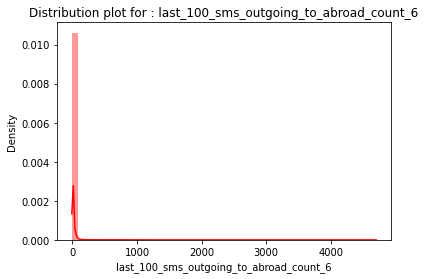

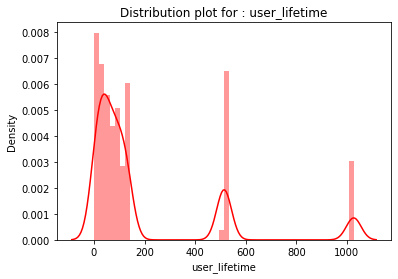

In [ ]:
for i in final_set.columns:
  sns.distplot(final_set[i], hist=True, kde=True, color = 'red')
  plt.title("Distribution plot for : "+i)
  plt.show()

In [135]:
final_set_cleaned.describe()

,user_account_id,user_no_outgoing_activity_in_days_8,reloads_inactive_days_8,reloads_count_8,calls_outgoing_spendings_max_8,calls_outgoing_duration_max_8,calls_outgoing_inactive_days_8,calls_outgoing_to_onnet_count_8,calls_outgoing_to_offnet_count_8,calls_outgoing_to_abroad_count_8,...,user_has_outgoing_calls_6,user_has_outgoing_sms_8,user_has_outgoing_sms_7,user_has_outgoing_sms_6,user_does_reload_8,user_does_reload_7,user_does_reload_6,user_use_gprs_8,user_use_gprs_7,user_use_gprs_6
count,6.646900e+04,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,...,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000
mean,5.948572e+05,2.881072,368.062465,0.876755,0.837907,4.615810,126.897080,0.473815,13.851209,2.259850,...,0.760023,0.626277,0.593299,0.584287,0.535001,0.385548,0.428139,0.051287,0.045961,0.040982
std,4.292423e+05,2.813042,576.308002,1.321438,1.668150,7.224707,385.338006,2.957070,31.437976,11.369895,...,0.427072,0.483795,0.491222,0.492848,0.498777,0.486728,0.494813,0.220584,0.209403,0.198249
min,1.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.501070e+05,1.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.135120e+05,1.000000,30.000000,1.000000,0.250000,1.870000,2.000000,0.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.041120e+06,4.000000,1338.000000,1.000000,0.990000,6.020000,7.000000,0.000000,15.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.196944e+06,10.000000,1338.000000,30.000000,59.400000,60.000000,1338.000000,149.000000,2231.000000,759.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
# Columns that are categorical  are now merged to create final set for modeling.
final_set_cleaned=pd.concat([final_set,sample_cat_set],axis=1)
final_set_cleaned.shape

(66469, 70)

In [ ]:
# Final columns that are to be considered for modeling.
final_set_cleaned.columns

Index(['user_account_id', 'user_no_outgoing_activity_in_days_8',
       'reloads_inactive_days_8', 'reloads_count_8',
       'calls_outgoing_spendings_max_8', 'calls_outgoing_duration_max_8',
       'calls_outgoing_inactive_days_8', 'calls_outgoing_to_onnet_count_8',
       'calls_outgoing_to_offnet_count_8', 'calls_outgoing_to_abroad_count_8',
       'calls_outgoing_to_abroad_spendings_8', 'sms_outgoing_spendings_max_8',
       'sms_outgoing_inactive_days_8', 'sms_outgoing_to_onnet_spendings_8',
       'sms_outgoing_to_abroad_spendings_8', 'sms_incoming_count_8',
       'sms_incoming_spendings_8', 'sms_incoming_from_abroad_count_8',
       'sms_incoming_from_abroad_spendings_8', 'gprs_usage_8',
       'reloads_inactive_days_7', 'reloads_count_7',
       'calls_outgoing_spendings_max_7', 'calls_outgoing_duration_max_7',
       'calls_outgoing_to_onnet_count_7', 'calls_outgoing_to_abroad_count_7',
       'calls_outgoing_to_abroad_spendings_7', 'sms_outgoing_spendings_max_7',
       'sms

In [137]:
#Expoting cleaned dataset for future inference
final_set_cleaned.to_csv('cleaned.csv', index=False)

In [7]:
final_set_cleaned=pd.read_csv('/content/drive/MyDrive/cleaned.csv')
final_set_cleaned.head()

,user_account_id,user_no_outgoing_activity_in_days_8,reloads_inactive_days_8,reloads_count_8,calls_outgoing_spendings_max_8,calls_outgoing_duration_max_8,calls_outgoing_inactive_days_8,calls_outgoing_to_onnet_count_8,calls_outgoing_to_offnet_count_8,calls_outgoing_to_abroad_count_8,...,user_has_outgoing_calls_6,user_has_outgoing_sms_8,user_has_outgoing_sms_7,user_has_outgoing_sms_6,user_does_reload_8,user_does_reload_7,user_does_reload_6,user_use_gprs_8,user_use_gprs_7,user_use_gprs_6
0,376265.0,2.0,3.0,3.0,4.96,33.05,2.0,0.0,43.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1151965.0,2.0,30.0,1.0,0.78,12.20,2.0,0.0,15.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1186430.0,1.0,12.0,2.0,4.15,27.67,1.0,0.0,4.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1036474.0,1.0,1.0,1.0,0.57,3.80,1.0,0.0,20.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,934461.0,3.0,39.0,0.0,0.00,0.58,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# Splitting dataset

In [164]:
# Preparing target variable for modeling
y=churners['churn']

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_set_cleaned,y,random_state=42,test_size=0.2,shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(53175, 70)
(13294, 70)
(53175,)
(13294,)


y_test and y_train have equal ratio of 0 and 1 .

In [154]:
y_test.value_counts()

0.0    10518
1.0     2776
Name: churn, dtype: int64

In [155]:
y_train.value_counts()

0.0    42044
1.0    11131
Name: churn, dtype: int64

### Treating unbalanced train data

  Treating the unbalanced data with over,under or other sampling techniques is leading to overfitting and not yealding good precision and recall scores which is important for the model.

  Hence exluded this frm modeling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
#X = X_train
#Y = y_train
# here is the distribution of the original data
#print(sorted(Counter(Y).items()))

In [ ]:
#ros = RandomOverSampler(random_state=0)
#X_resampled, y_resampled = ros.fit_resample(X, Y)

#print(sorted(Counter(y_resampled).items()))

In [ ]:
#X_train=X_resampled
#y_train=y_resampled

### Seperating continuous and categorical data

In [166]:
X_train_member_id=X_train['user_account_id']
X_train=X_train.drop(['user_account_id'],axis=1)
X_test_member_id=X_test['user_account_id']
X_test=X_test.drop(['user_account_id'],axis=1)

In [167]:
# Categorical columns
cols=['user_intake_8','user_intake_7','user_intake_6',
          'user_has_outgoing_calls_8','user_has_outgoing_calls_7','user_has_outgoing_calls_6',
          'user_has_outgoing_sms_8','user_has_outgoing_sms_7','user_has_outgoing_sms_6',
          'user_does_reload_8','user_does_reload_7','user_does_reload_6',
          'user_use_gprs_8','user_use_gprs_7','user_use_gprs_6']

In [168]:
# Creating datasets only with continuous variables for modeling
X_train_cont=X_train.drop(cols,axis=1)
print(X_train_cont.shape)
X_test_cont=X_test.drop(cols,axis=1)
print(X_test_cont.shape)

(53175, 54)
(13294, 54)


### Standardization on continuous variables

In [169]:
#Applying standard scalar on continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cont) 
X_test_scaled = scaler.transform(X_test_cont)

In [170]:
X_train_final=pd.DataFrame(X_train_scaled,columns=X_train_cont.columns)
X_test_final=pd.DataFrame(X_test_scaled,columns=X_test_cont.columns)

In [171]:
print(X_train_final.shape)
print(X_test_final.shape)

(53175, 54)
(13294, 54)


### Transformation on continuous variables

Boxcox cannot be applied due to the zeros in the dataset. Hence using Yeo-johnson transformation for transformation.

In [172]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_train_transformed = pt.fit_transform(X_train_final)
X_test_transformed = pt.transform(X_test_final)

In [173]:
X_train_final=pd.DataFrame(X_train_transformed,columns=X_train_cont.columns)
X_test_final=pd.DataFrame(X_test_transformed,columns=X_test_cont.columns)

In [174]:
print(X_train_final.shape)
print(X_test_final.shape)

(53175, 54)
(13294, 54)


After transformation, it can be observed that there is little improvement in distributions.

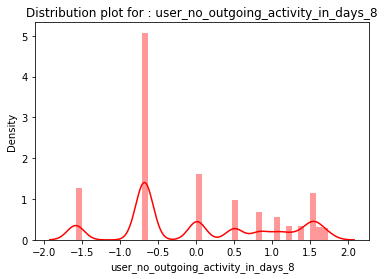

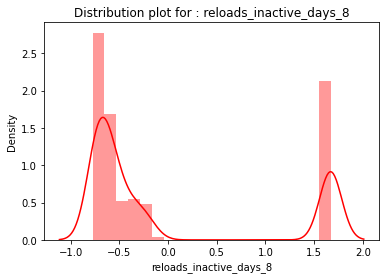

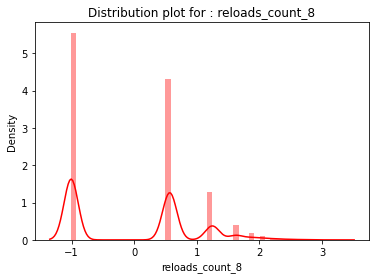

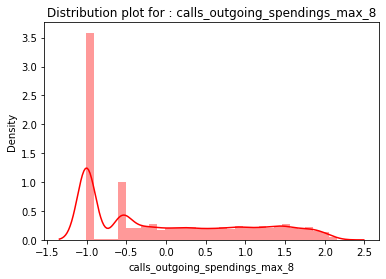

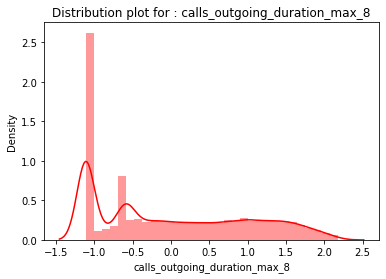

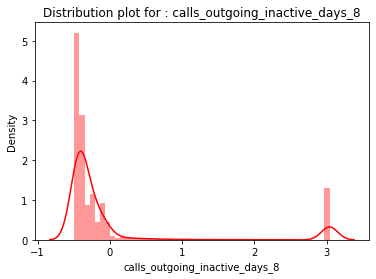

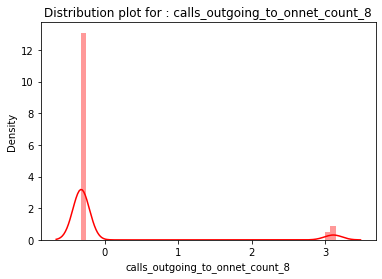

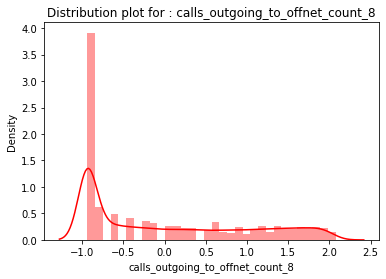

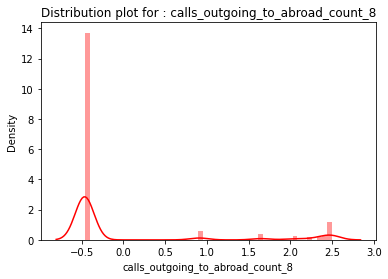

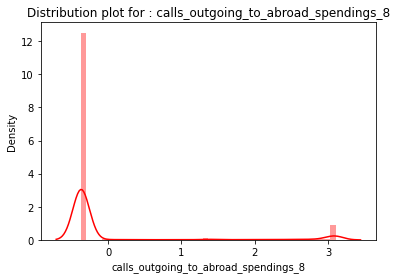

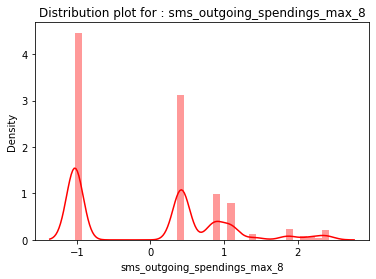

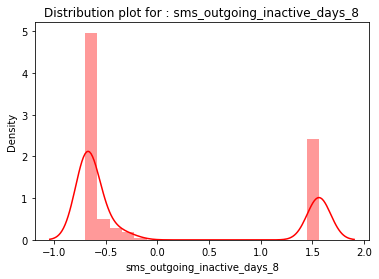

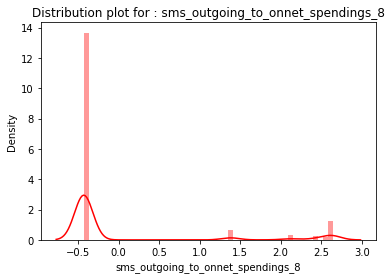

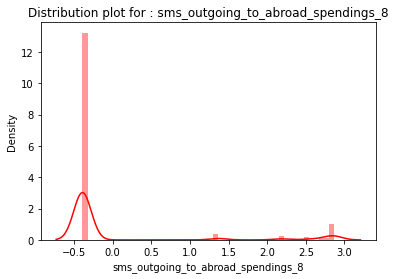

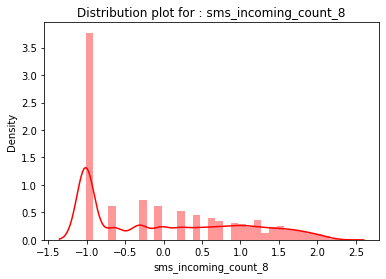

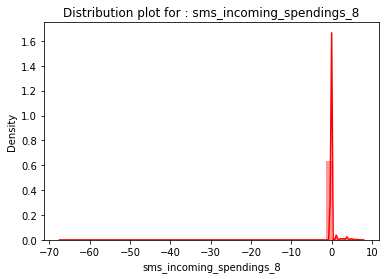

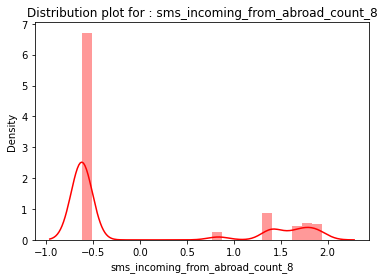

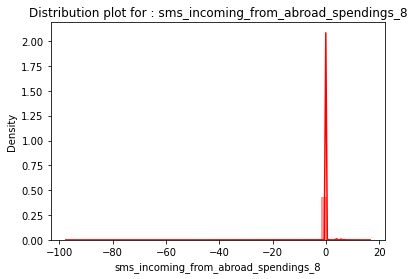

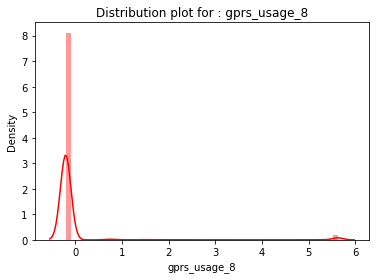

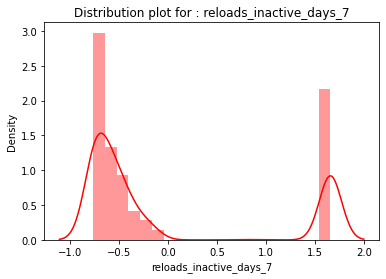

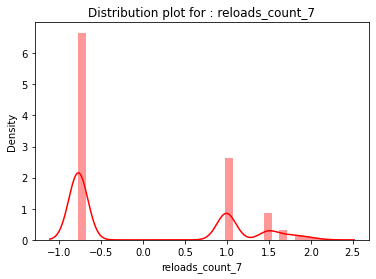

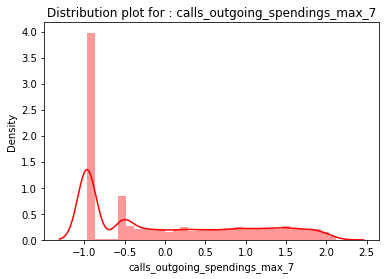

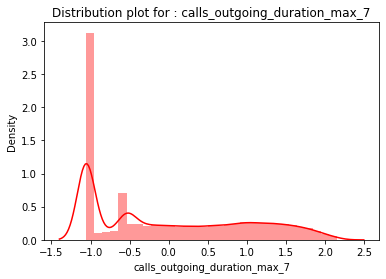

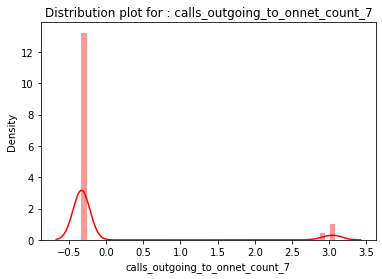

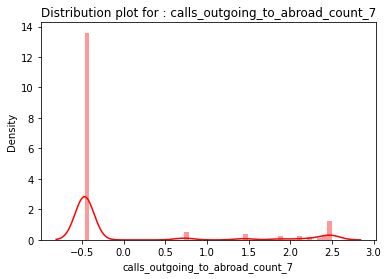

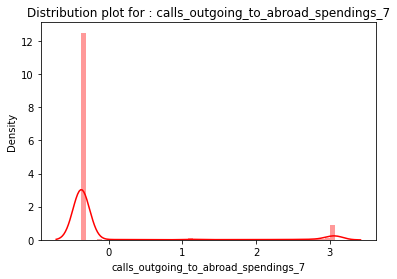

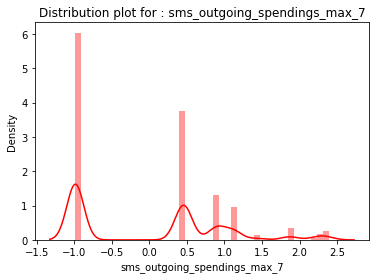

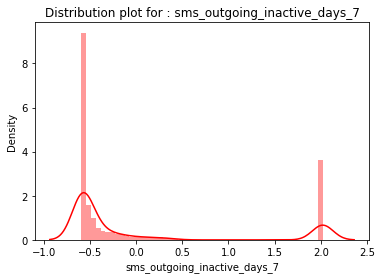

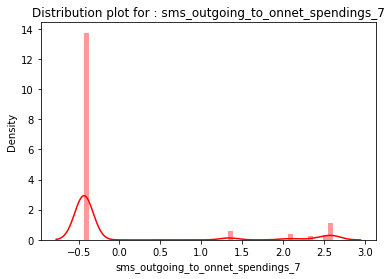

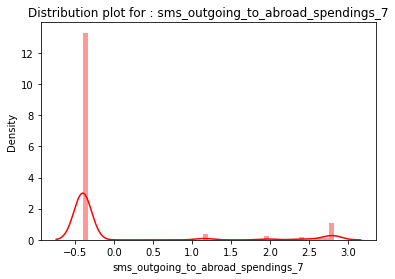

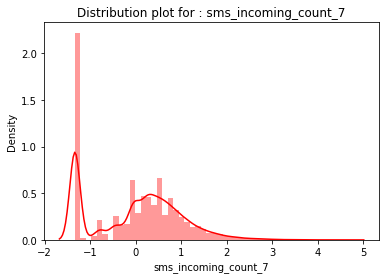

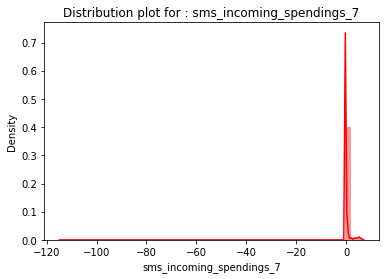

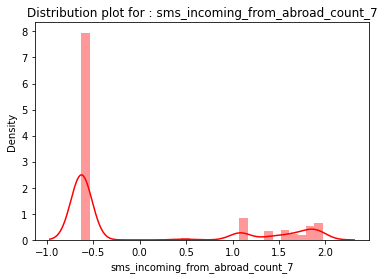

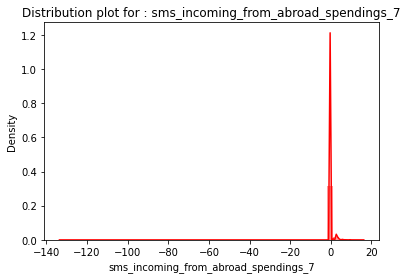

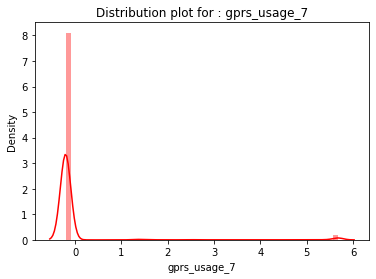

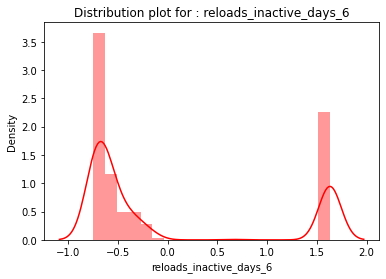

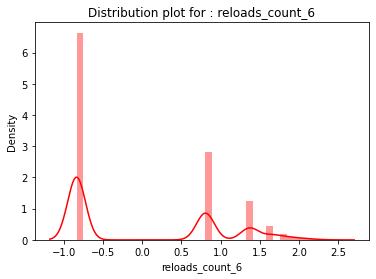

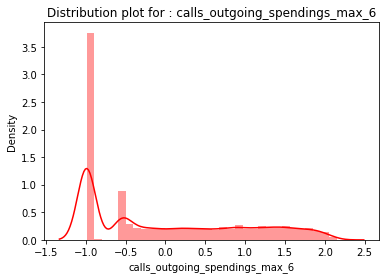

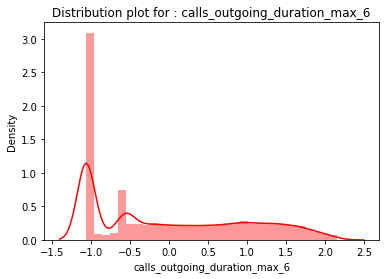

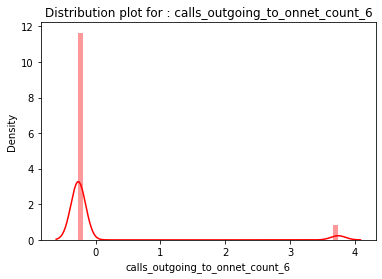

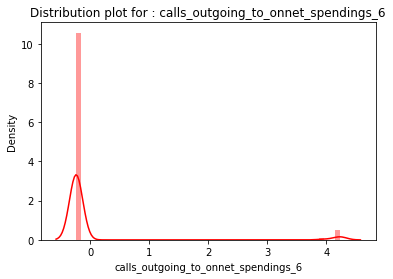

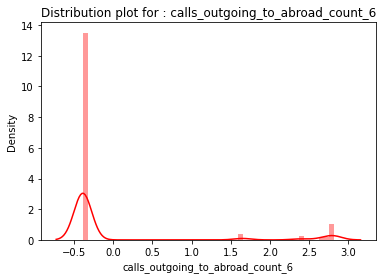

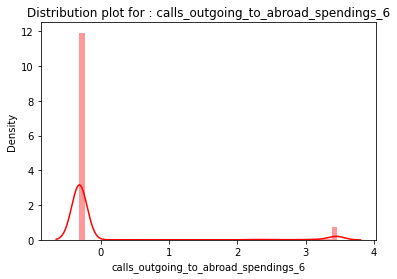

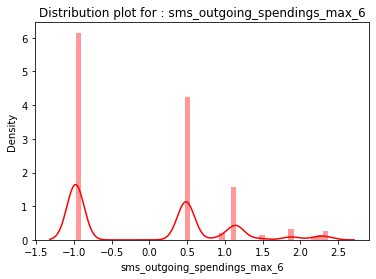

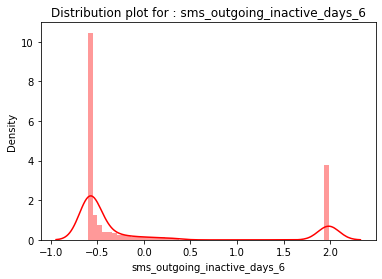

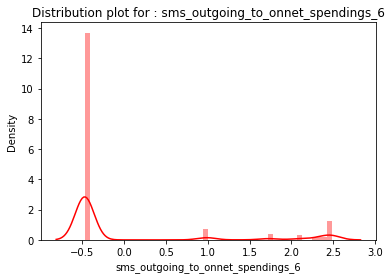

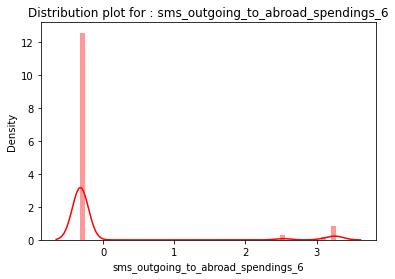

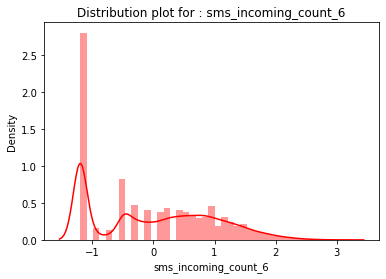

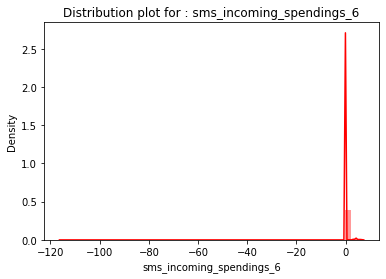

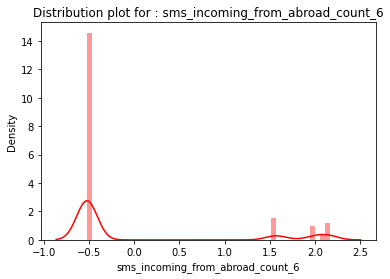

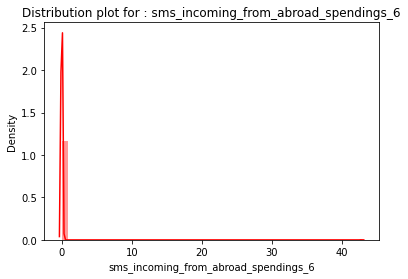

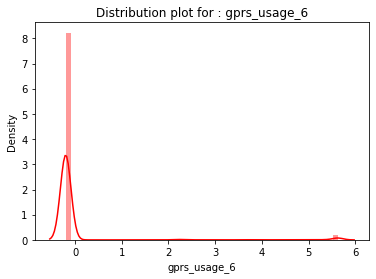

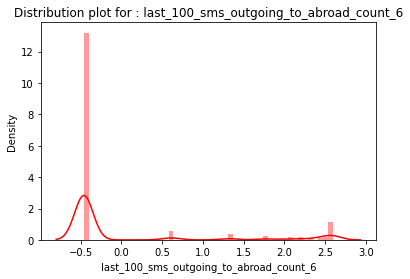

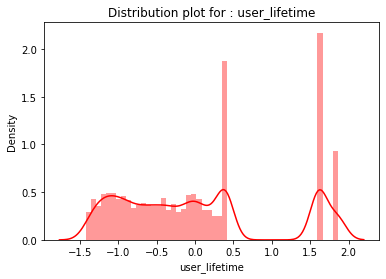

In [175]:
for i in X_train_final.columns:
  sns.distplot(X_train_final[i], hist=True, kde=True, color = 'red')
  plt.title("Distribution plot for : "+i)
  plt.show()

### Reconstructing train and test sets adding categorical to continuous columns.

In [176]:
X_train_cat=X_train.drop(X_train_cont,axis=1)
print(X_train_cat.shape)
X_test_cat=X_test.drop(X_test_cont,axis=1)
print(X_test_cat.shape)

(53175, 15)
(13294, 15)


In [177]:
X_train_cat=X_train_cat.reset_index()
X_test_cat=X_test_cat.reset_index()

In [178]:
X_train_model=pd.concat([X_train_final,X_train_cat],axis=1)
print(X_train_model.shape)
X_test_model=pd.concat([X_test_final,X_test_cat],axis=1)
print(X_test_model.shape)

(53175, 70)
(13294, 70)


# Modeling

In [179]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [180]:
#pip install xgboost
import xgboost as xgb
from sklearn import svm

In [181]:
# Modeling using the listed models
cv_LR = LogisticRegression()
cv_DTC = DecisionTreeClassifier(random_state=1)
cv_RFC = RandomForestClassifier(random_state=1)
cv_GBC = GradientBoostingClassifier(random_state=1)
cv_xgb = xgb.XGBClassifier()
#cv_svm = svm.SVC()

models = [cv_LR, cv_DTC, cv_RFC, cv_GBC, cv_xgb]

scaler = StandardScaler()

cv = KFold(n_splits=5, shuffle=True, random_state=1)

for model in models:

  pipeline = Pipeline([('estimator', model)]) 

  scores = cross_val_score(pipeline, X_train_model, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

  #print(f'{model}: {scores}')

  ave_scores = np.mean(scores)

  print(f'{model} accuracy: {ave_scores}')

LogisticRegression() accuracy: 0.7917442407146215
DecisionTreeClassifier(random_state=1) accuracy: 0.7091490362012224
RandomForestClassifier(random_state=1) accuracy: 0.7914433474377057
GradientBoostingClassifier(random_state=1) accuracy: 0.8083121767748003
XGBClassifier() accuracy: 0.8073154677950164


F1-score which is combination of both precision and recall is also a better metric to decide the better performing model in this case because the target variable(churn) is unbalanced.

In [ ]:
for model in models:

  pipeline = Pipeline([('estimator', model)]) 

  scores = cross_val_score(pipeline, X_train_final, y_train, scoring='f1', cv=cv, n_jobs=-1)

  #print(f'{model}: {scores}')

  ave_scores = np.mean(scores)

  print(f'{model} accuracy: {ave_scores}')

LogisticRegression() accuracy: 0.2545819214116201
DecisionTreeClassifier(random_state=1) accuracy: 0.3374076003048853
RandomForestClassifier(random_state=1) accuracy: 0.31550644755039964
GradientBoostingClassifier(random_state=1) accuracy: 0.30907269159288864
XGBClassifier() accuracy: 0.30891529044989663


Almost all given models are giving equal f1 scores which are low.
This might be due to the unequal ratio of values in target variable. 

But taking accuracy and f1-score into consideration, it can be observed that XGB, Gradient boosting classifier are better performing models.

The precision which focuses on positives is highest for xgb. Hence going forward, this model is considered for model tuning.

### Gradient descent results

It can be observed that

 precision for '1' in train set is 0.68 

 Accuracy score for train set: 0.8116972261401034

 precision foe '1' in test set: 0.66.

 Accuracy score for test set : 0.8102151

In [182]:
cv_GBC.fit(X_train_model, y_train)

# store the predictions
train_preds = cv_GBC.predict(X_train_model)
test_preds = cv_GBC.predict(X_test_model)

In [183]:
# train confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print('Accuracy score for train set:',accuracy_score(y_train,train_preds))
confusion_matrix(y_true=y_train, y_pred=train_preds)

Accuracy score for train set: 0.8116972261401034


array([[41070,   974],
       [ 9039,  2092]])

In [184]:
# train confusion matrix and accuracy
print(confusion_matrix(y_true=y_test, y_pred=test_preds))
print('Accuracy score for test set:',accuracy_score(y_test,test_preds))

[[10256   262]
 [ 2261   515]]
Accuracy score for test set: 0.8102151346472093


In [185]:
from sklearn.metrics import classification_report
print("Classification report for Train set")
print(classification_report(y_true=y_train, y_pred=train_preds))
print('\n')
print("Classification report for Test set")
print(classification_report(y_true=y_test, y_pred=test_preds))

Classification report for Train set
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89     42044
         1.0       0.68      0.19      0.29     11131

    accuracy                           0.81     53175
   macro avg       0.75      0.58      0.59     53175
weighted avg       0.79      0.81      0.77     53175



Classification report for Test set
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89     10518
         1.0       0.66      0.19      0.29      2776

    accuracy                           0.81     13294
   macro avg       0.74      0.58      0.59     13294
weighted avg       0.79      0.81      0.77     13294



### XGB results


It can be observed that

 precision for '1' in train set is 0.68 

 Accuracy for train set : 0.8130
 
 precision foe '1' in test set: 0.67.

 Accuracy for train set : 0.8096

In [186]:
cv_xgb.fit(X_train_model, y_train)

# store the predictions
train_preds = cv_xgb.predict(X_train_model)
test_preds = cv_xgb.predict(X_test_model)

In [187]:
# train confusion matrix and accuracy
print(confusion_matrix(y_true=y_train, y_pred=train_preds))
print('Accuracy_score for train set',accuracy_score(y_train,train_preds))

[[41136   908]
 [ 9179  1952]]
Accuracy_score for train set 0.8103055947343677


In [188]:
# test confusion matrix and accuracy
print(confusion_matrix(y_true=y_test, y_pred=test_preds))
print('Accuracy_score for test set',accuracy_score(y_test,test_preds))

[[10286   232]
 [ 2299   477]]
Accuracy_score for test set 0.8096133594102602


In [189]:
from sklearn.metrics import classification_report
print("Classification report for Train set")
print(classification_report(y_true=y_train, y_pred=train_preds))
print('\n')
print("Classification report for Test set")
print(classification_report(y_true=y_test, y_pred=test_preds))

Classification report for Train set
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89     42044
         1.0       0.68      0.18      0.28     11131

    accuracy                           0.81     53175
   macro avg       0.75      0.58      0.58     53175
weighted avg       0.79      0.81      0.76     53175



Classification report for Test set
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89     10518
         1.0       0.67      0.17      0.27      2776

    accuracy                           0.81     13294
   macro avg       0.75      0.57      0.58     13294
weighted avg       0.79      0.81      0.76     13294



## Model tuning XGB Classifier

In [150]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="binary:logistic",n_estimators=400,gamma=0)
param_grid = {
              'scale_pos_weight':[2,4],
              'colsample_bytree' :[0.6,0.8],
              'learning_rate':[0.06,0.1],
              'subsample':[0.8,1],
              }

grid_cv_xgb = GridSearchCV(xgb, param_grid, cv=5)

grid_cv_xgb.fit(X_train_model,y_train)

print("Accuracy::{}".format(grid_cv_xgb.best_score_))
print("Best Hyperparameters are::\n{}".format(grid_cv_xgb.best_params_))

Accuracy::0.7948283968030089
Best Hyperparameters::
{'colsample_bytree': 0.6, 'learning_rate': 0.06, 'scale_pos_weight': 2, 'subsample': 1}


In [190]:
# Model tuning with best parameters
from xgboost import XGBClassifier
cv_xgb=XGBClassifier(colsample_bytree=0.6, learning_rate=0.06, scale_pos_weight=2,subsample=1,n_estimators=400,gamma=0)
cv_xgb.fit(X_train_model, y_train)

train_preds = cv_xgb.predict(X_train_model)
test_preds = cv_xgb.predict(X_test_model)

In [191]:
#Confusion matrix and accuracy for train set
print(confusion_matrix(y_true=y_train, y_pred=train_preds))
print("Accuracy score for train set :",accuracy_score(y_train,train_preds))

[[38339  3705]
 [ 6879  4252]]
Accuracy score for train set : 0.8009590973201692


In [195]:
# test confusion matrix and accuracy
print(confusion_matrix(y_true=y_test, y_pred=test_preds))
print("Accuracy score for test set :",accuracy_score(y_test,test_preds))

[[9618  900]
 [1699 1077]]
Accuracy score for test set : 0.8044982698961938


In [48]:
from sklearn.metrics import classification_report
print("Classification report for Train set")
print(classification_report(y_true=y_train, y_pred=train_preds))
print('\n')
print("Classification report for Test set")
print(classification_report(y_true=y_test, y_pred=test_preds))

Classification report for Train set
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89     42044
         1.0       0.68      0.18      0.28     11131

    accuracy                           0.81     53175
   macro avg       0.75      0.58      0.58     53175
weighted avg       0.79      0.81      0.76     53175



Classification report for Test set
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89     10518
         1.0       0.67      0.17      0.27      2776

    accuracy                           0.81     13294
   macro avg       0.75      0.57      0.58     13294
weighted avg       0.79      0.81      0.76     13294



After model tuning:

**Precision of 1:**

 for train set: 0.68

 for test set : 0.67

 **Recall of 1**:
  
 for train set: 0.82

 for test set: 0.82
     

### ROC and PR curve

In [49]:
test_preds_proba_XGB = cv_xgb.predict_proba(X_test_model)[:,1]

index of optimal threshold:753
optimal probability threshold:0.2439580261707306
fpr coordinate : 0.1508841985168283
tpr coordinate : 0.486671469740634
AUC: 0.7428468652339094


Text(0.5, 1.0, 'ROC-curve')

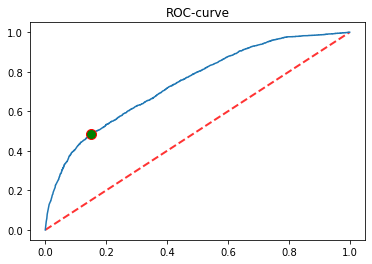

In [193]:
import matplotlib.pyplot as plt

fpr,tpr,thresholds=roc_curve(y_test, test_preds_proba_XGB)
optimal_idx=np.argmax(tpr-fpr)
optimal_threshold=thresholds[optimal_idx]
print(f'index of optimal threshold:{optimal_idx}')
print(f'optimal probability threshold:{optimal_threshold}')
print(f'fpr coordinate : {fpr[optimal_idx]}')
print(f'tpr coordinate : {tpr[optimal_idx]}')
print(f'AUC: {auc(fpr,tpr)}')

plt.plot([0,1],[0,1],linestyle="--",lw=2,color="r",label="Chance",alpha=0.8)
plt.plot(fpr,tpr,label="XGB")
plt.plot(fpr[optimal_idx],tpr[optimal_idx],marker="o",markersize=10,markeredgecolor="red",markerfacecolor="green")
plt.title('ROC-curve')

Best threshold: 0.24395803
best f1 score 0.47287364368218415
index of max f1: 6494
area ynder pr curve 0.4710859292522859


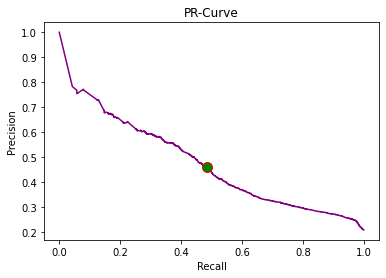

In [194]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision,recall,thresholds=precision_recall_curve(y_test,test_preds_proba_XGB)

f1_scores=2*precision*recall/(recall+precision)
print('Best threshold:',thresholds[np.argmax(f1_scores)])
print('best f1 score',np.max(f1_scores))
print('index of max f1:',np.argmax(f1_scores))
print('area ynder pr curve',average_precision_score(y_test,test_preds_proba_XGB))

optimal_idx=np.argmax(f1_scores)

fig,ax=plt.subplots()
ax.plot(recall,precision,color='purple')

ax.plot(recall[optimal_idx],precision[optimal_idx],marker="o",markersize=10,markeredgecolor="red",markerfacecolor="green")
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.title('PR-Curve')
plt.show()

In [52]:
# Computing accuracy and confusion matrix using threshold
print(confusion_matrix(y_test,cv_xgb.predict_proba(X_test_model)[:,1]>optimal_threshold))
print('\n')
print(f'test set accuracy score:{accuracy_score(y_test,cv_xgb.predict_proba(X_test_model)[:,1]>optimal_threshold)}')

[[8990 1528]
 [1449 1327]]


test set accuracy score:0.7760643899503535


In [53]:
test_preds=cv_xgb.predict_proba(X_test_model)[:,1]>optimal_threshold

In [54]:
print("Classification report for Test set")
print(classification_report(y_true=y_test, y_pred=test_preds))

Classification report for Test set
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86     10518
         1.0       0.46      0.48      0.47      2776

    accuracy                           0.78     13294
   macro avg       0.66      0.67      0.66     13294
weighted avg       0.78      0.78      0.78     13294



**After applying threshold:**

Precision for test: 0.46

Recall for test: 0.48

Area under curve :0.72

Optimal threshold :0.243

best f1-score : 0.427

# Feature importances

Text(0.5, 0, 'Xgboost Feature Importance')

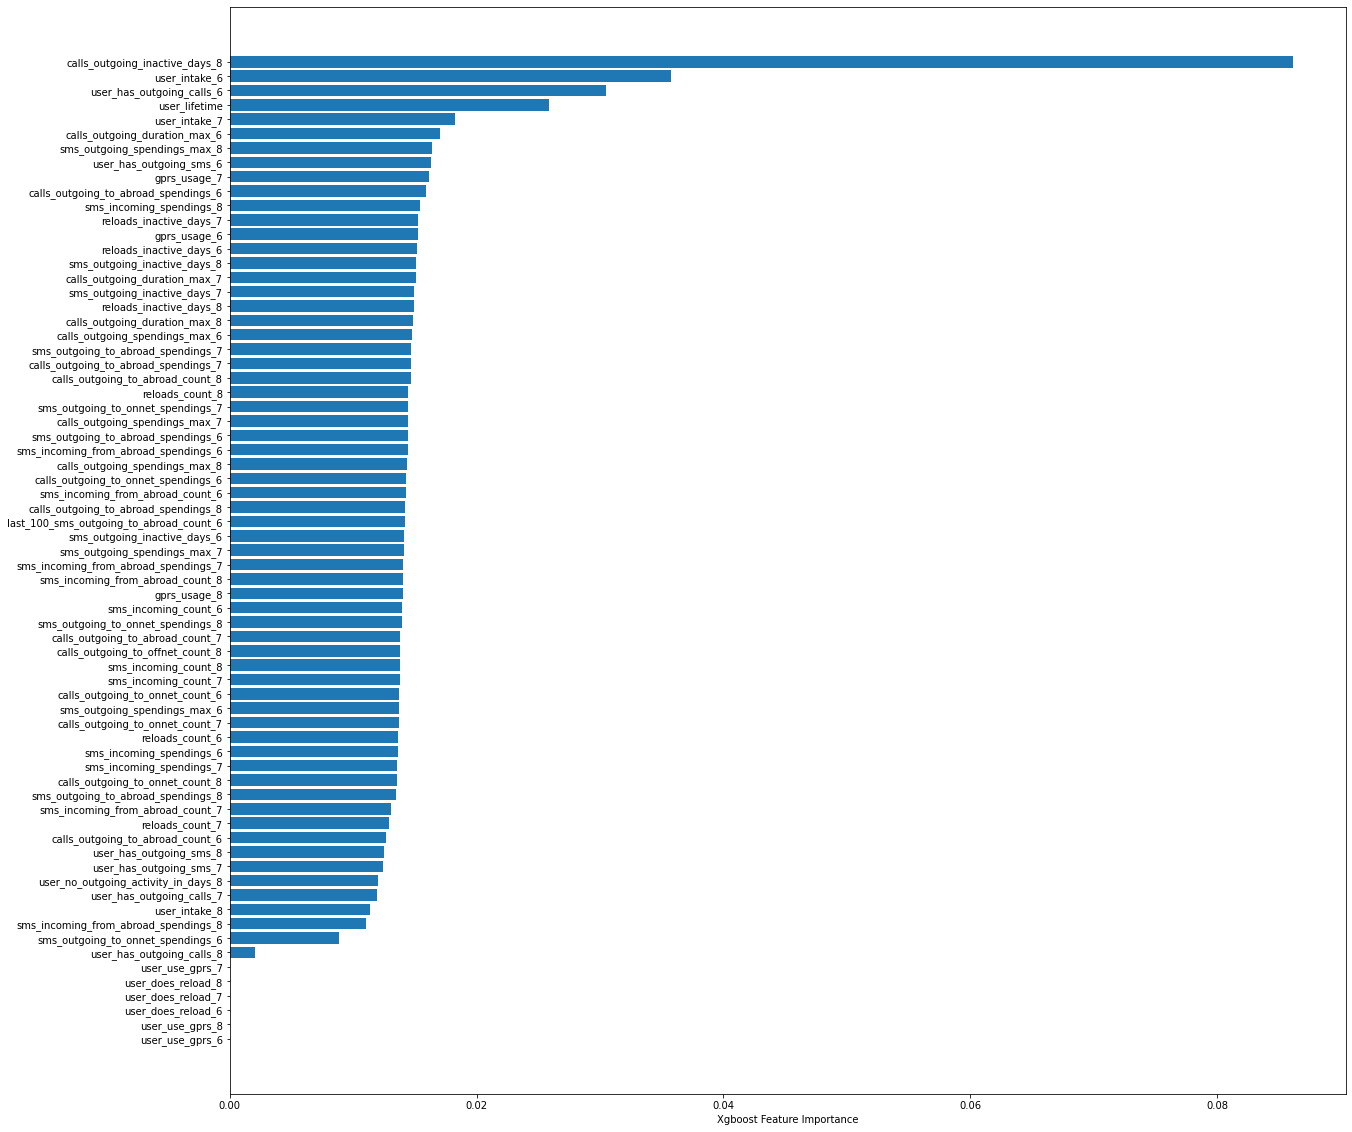

In [ ]:
#Feature importances  thriugh xgb model
sorted_idx = cv_xgb.feature_importances_.argsort()
plt.figure(figsize=(20,20))
plt.barh(X_train_model.columns[sorted_idx], cv_xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

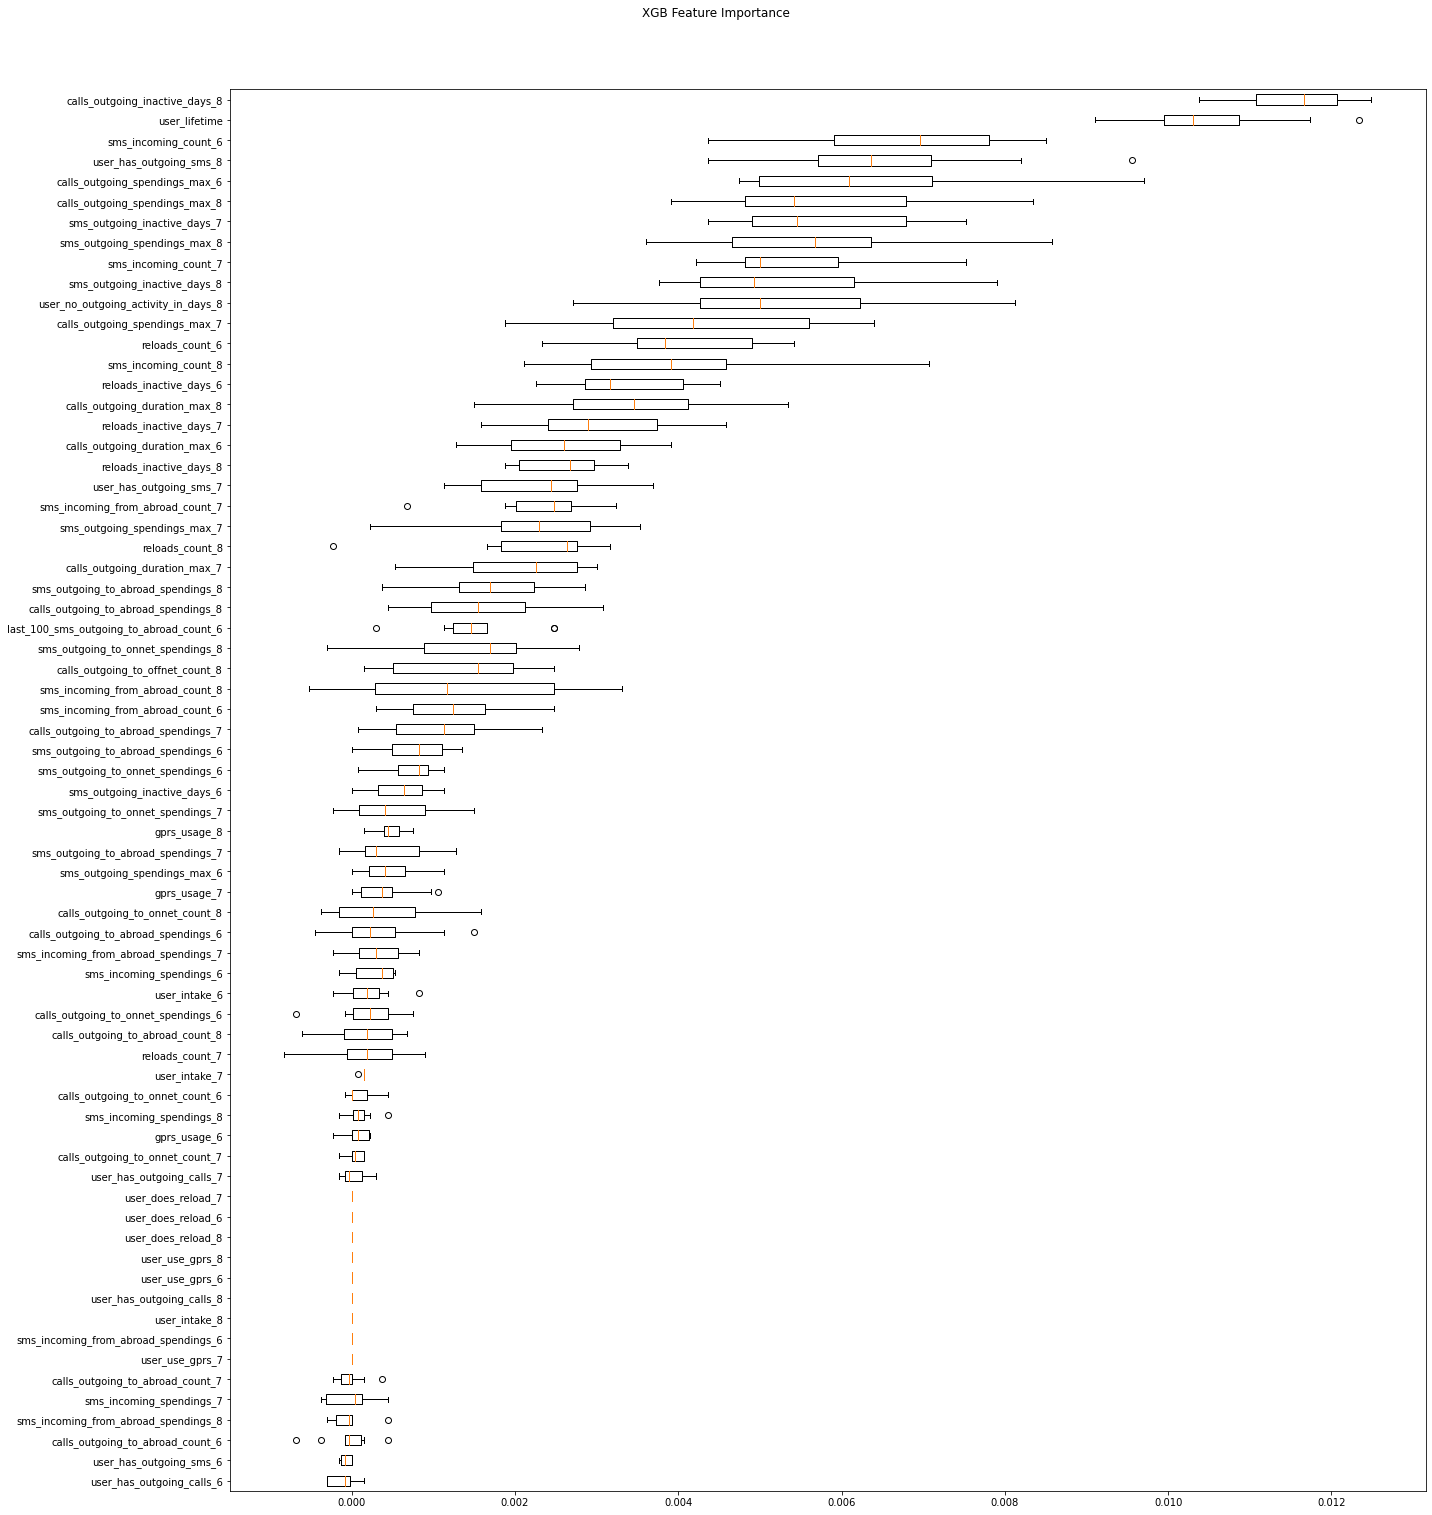

In [ ]:
# Feature importance through permutations
from sklearn.inspection import permutation_importance
result = permutation_importance(cv_xgb, X_test_model, y_test, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(20, 20))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_test_model.columns[perm_sorted_idx])
fig.suptitle('XGB Feature Importance', y=1.05) 
fig.tight_layout()
plt.show()

Few columns that are important in this model are:

**calls_outgoing_inactive_days in 8th month**

**user_lifetime**

**user_intake in 8th month**

**user_has_outgoing_calls in 8th month**


# Business insights

Taking these important features into consideration, few business insights  can be determined.

## Insight 1

**Insight:**

It can be observed that the user spendings for customers who exited the company having outgoing calls declined in 8th month.
Among the customers retaining also user spendings with outgoing calls declined a little.

But relatively user spendings for customers who do not have outgoing calls and also retaining is increasing for each month. 

This might due to increase in data usage and less use of out going calls.

**Recommendation:**

Hence to increase the user spendings among non churned customers and to retain exiting customers who have no out going calls, it is better to include plans that offer better coverage on data and less coverage on outgoing calls with relatively lower prices depending on their previous user spendings.


In [ ]:
final_set['user_lifetime']=user_lifetime

Text(0.5, 1.0, 'churn vs user_spendings_ vs user_has_outgoing_calls')

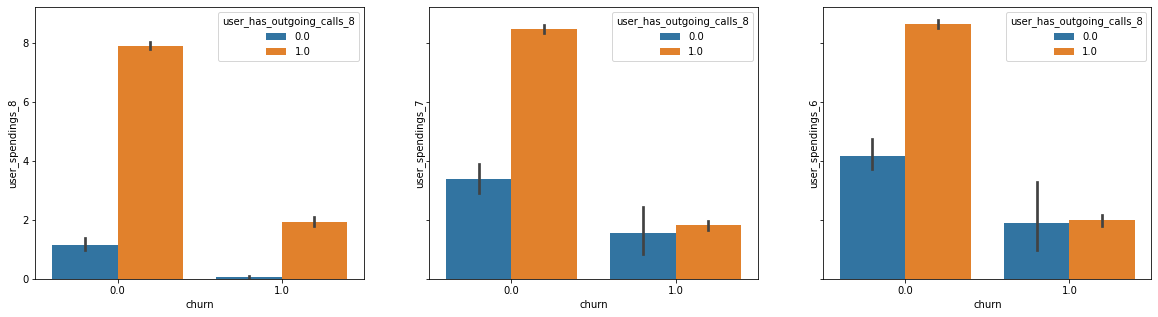

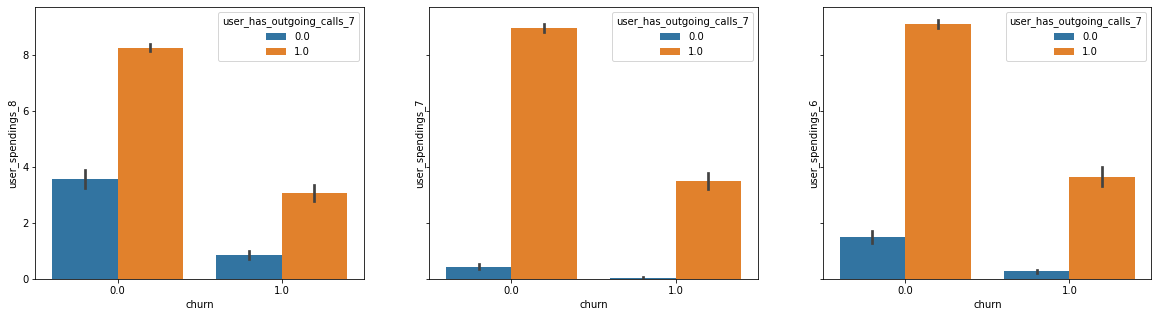

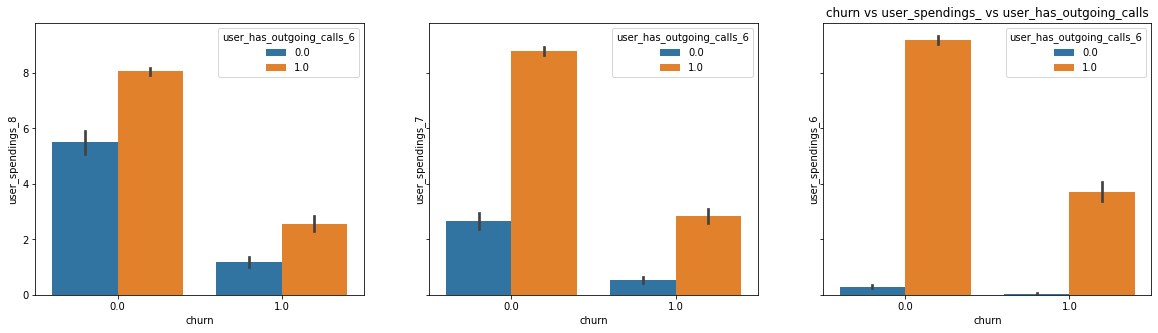

In [163]:
col=['user_has_outgoing_calls_8','user_has_outgoing_calls_7','user_has_outgoing_calls_6']

for i in col:
    fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
    sns.barplot(ax=axes[0],x="churn", y='user_spendings_8', hue=i, data=final_set)
    sns.barplot(ax=axes[1],x="churn", y='user_spendings_7', hue=i, data=final_set)
    sns.barplot(ax=axes[2],x="churn", y='user_spendings_6', hue=i, data=final_set)



## Insight 2

User spending and re-load have been drastically decreased in the month prior
to churn(August) for both continuing and leaving customers.
This may be due to user dissatisfaction during the period or change in coverage plans.

**Recommendation:**
 The company should try to improve customer experience through better network coverage. 
Offering discounts for each reload and decreasing per call, per SMS charge would help retain 
customers and also attract new customers.

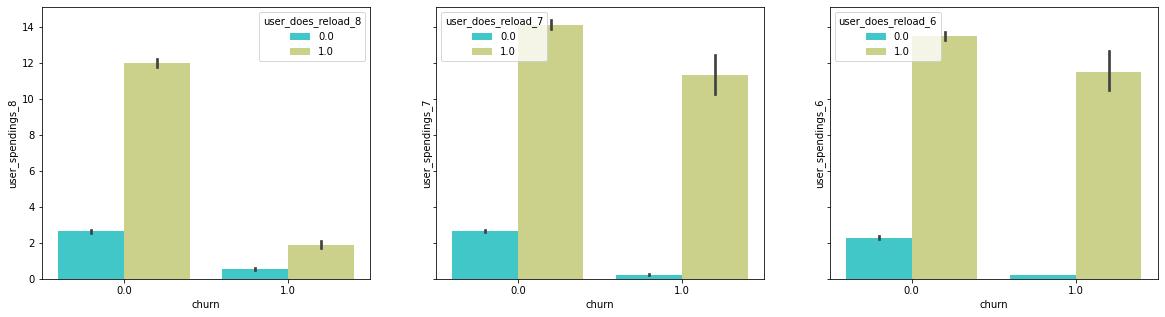

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
sns.barplot(ax=axes[0],x='churn',y='user_spendings_8',data=final_set, palette='rainbow',hue='user_does_reload_8')
sns.barplot(ax=axes[1],x='churn',y='user_spendings_7',data=final_set, palette='rainbow',hue='user_does_reload_7')
sns.barplot(ax=axes[2],x='churn',y='user_spendings_6',data=final_set, palette='rainbow',hue='user_does_reload_6')


## Insight 3

The majority of the customers spend 0 to 0.5 units of currency for each minute of an outgoing call. From the graph, we can see there are more customers in this range who are both
 churners and non-churners.

**Recommendation:** 
  An optimal usage plan should be implemented such that at a price of less than 0.3 for each minute of outgoing call will affect the customer base in such a way that non-churners 
spending's would be decreased to a certain extent and yet we will retain all the churners but provide them low-cost plan and let them use more.

Text(0.5, 1.0, 'churn vs spendings_to_outgoing_ratio_8')

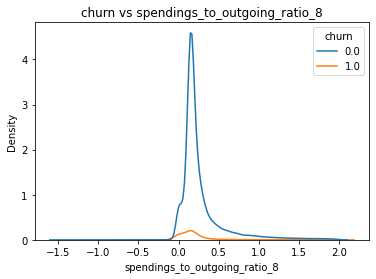

In [145]:
final_set['spendings_to_outgoing_ratio_8'] = final_set.user_spendings_8/final_set.calls_outgoing_duration_8

df11 = final_set.drop(final_set[final_set.spendings_to_outgoing_ratio_8 > 2].index)
sns.kdeplot(x='spendings_to_outgoing_ratio_8', data=df11, hue='churn')
plt.title('churn vs spendings_to_outgoing_ratio_8')

Text(0.5, 1.0, 'churn vs spendings_to_outgoing_ratio_7')

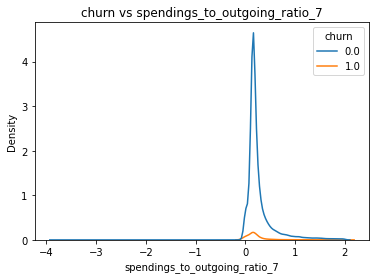

In [146]:
final_set['spendings_to_outgoing_ratio_7'] = final_set.user_spendings_7/final_set.calls_outgoing_duration_7

df11 = final_set.drop(final_set[final_set.spendings_to_outgoing_ratio_7 > 2].index)
sns.kdeplot(x='spendings_to_outgoing_ratio_7', data=df11, hue='churn')
plt.title('churn vs spendings_to_outgoing_ratio_7')

Text(0.5, 1.0, 'churn vs spendings_to_outgoing_ratio_6')

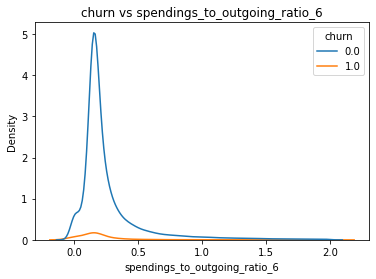

In [147]:
final_set['spendings_to_outgoing_ratio_6'] = final_set.user_spendings_6/final_set.calls_outgoing_duration_6

df11 = final_set.drop(final_set[final_set.spendings_to_outgoing_ratio_6 > 2].index)
sns.kdeplot(x='spendings_to_outgoing_ratio_6', data=df11, hue='churn')
plt.title('churn vs spendings_to_outgoing_ratio_6')